In [1]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import os
import csv

In [2]:
# Pathway of the CSV
TBRate_path = os.path.join("Resources", "TB_Rates_Cleaned.csv")

# Pathway of the CSV
TBRate_path = os.path.join("Resources", "TB_Rates_Cleaned.csv")

# Read the CSV using pandas
TBRate_df = pd.read_csv(TBRate_path)

# Read Columns
TBRate_df.columns


Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'cfr_pct', 'cfr_pct_lo', 'cfr_pct_hi',
       'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

In [3]:
# Get unique ISO 3 codes
unique_iso3_codes = TBRate_df['iso3'].unique()

# Read ISO3 Codes
print(unique_iso3_codes)

['AFG' 'ALB' 'DZA' 'ASM' 'AND' 'AGO' 'AIA' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS'
 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN'
 'BOL' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'CPV' 'KHM' 'CMR'
 'CAN' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'HKG' 'MAC' 'COL' 'COM' 'COG' 'COK'
 'CRI' 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'PRK' 'COD' 'DNK' 'DJI' 'DMA'
 'DOM' 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FJI' 'FIN' 'FRA'
 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GUM' 'GTM' 'GIN'
 'GNB' 'GUY' 'HTI' 'HND' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN'
 'LSO' 'LBR' 'LBY' 'LTU' 'LUX' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MHL'
 'MRT' 'MUS' 'MEX' 'FSM' 'MCO' 'MNG' 'MNE' 'MSR' 'MAR' 'MOZ' 'MMR' 'NAM'
 'NRU' 'NPL' 'NLD' 'ANT' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'NIU' 'MKD' 'MNP'
 'NOR' 'PSE' 'OMN' 'PAK' 'PLW' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'PRI' 'QAT' 'KOR' 'MDA' 'ROU' 'RUS' 'RWA' 'KNA' 'L

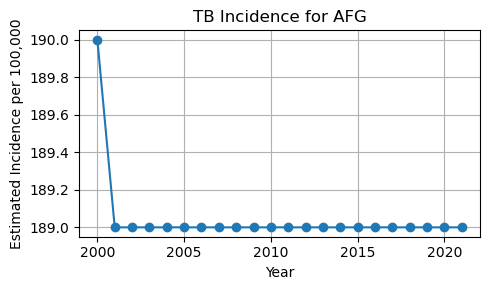

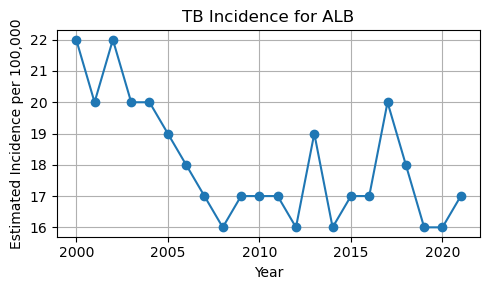

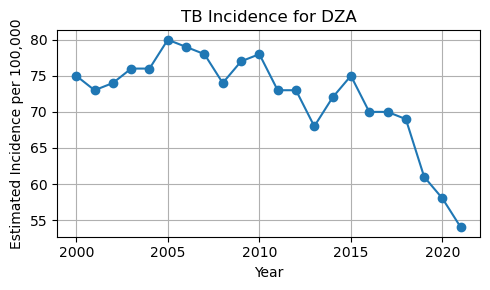

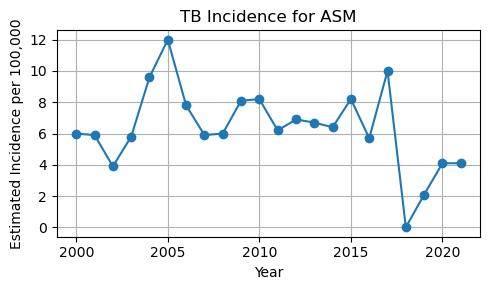

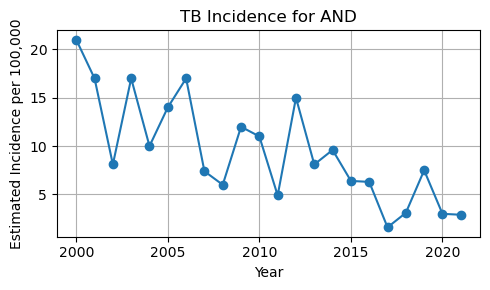

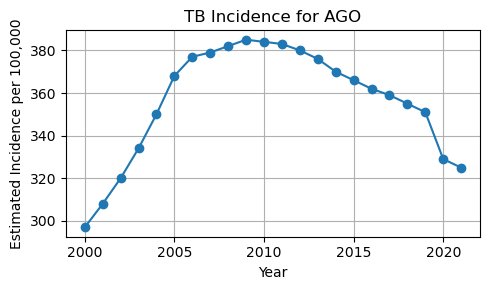

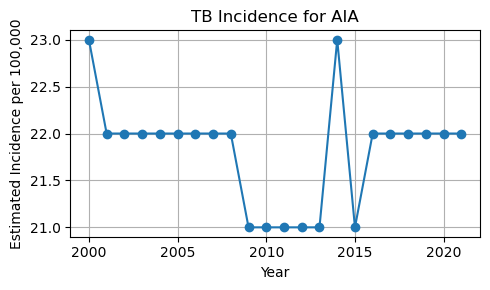

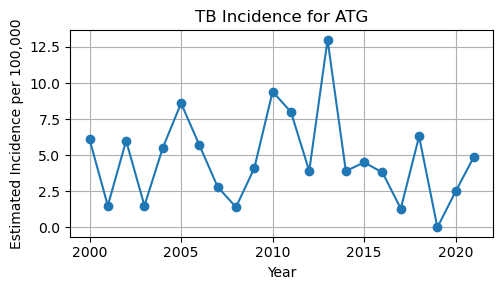

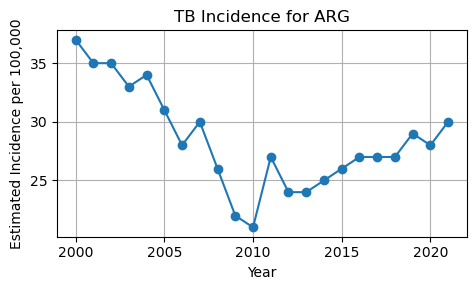

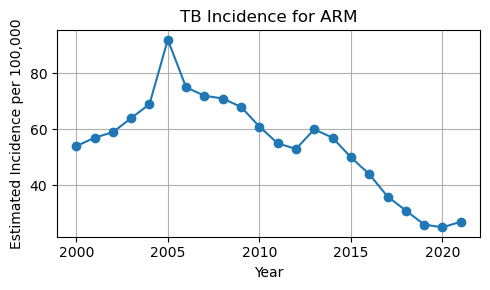

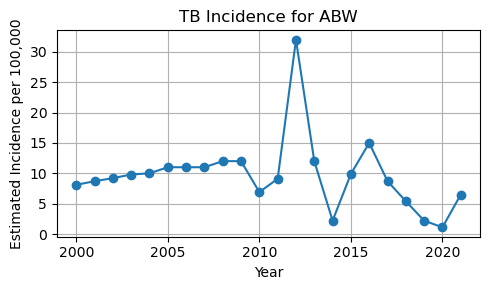

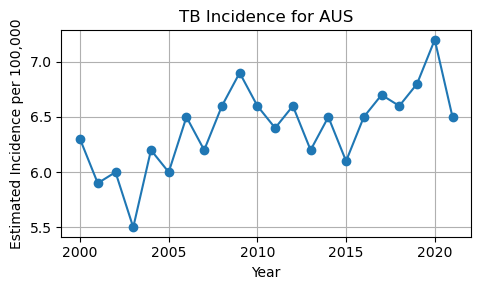

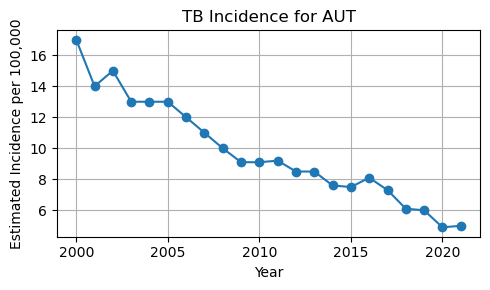

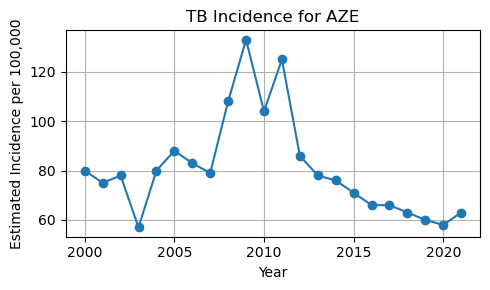

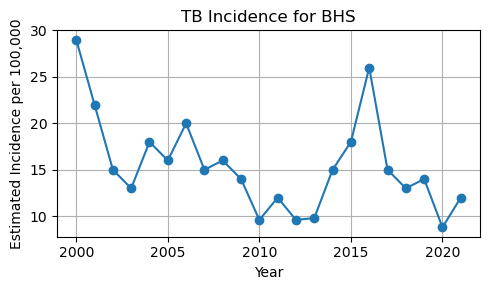

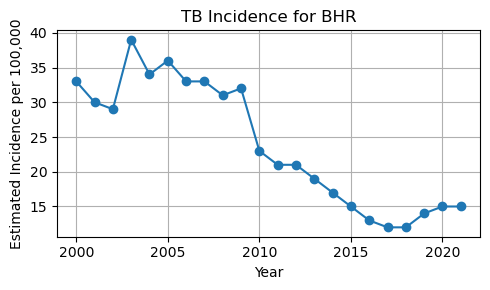

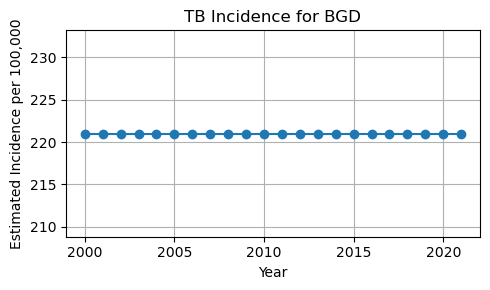

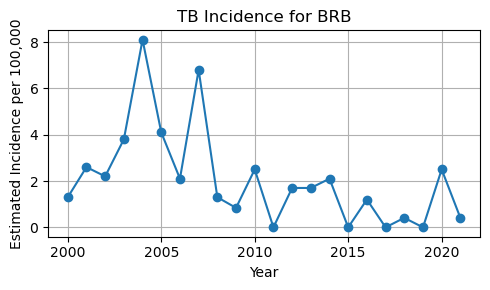

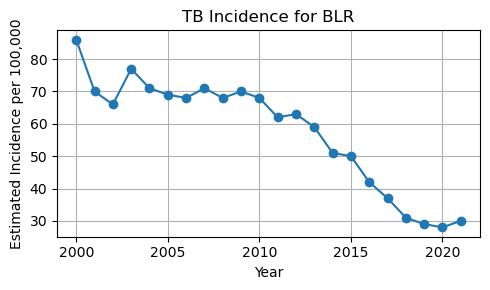

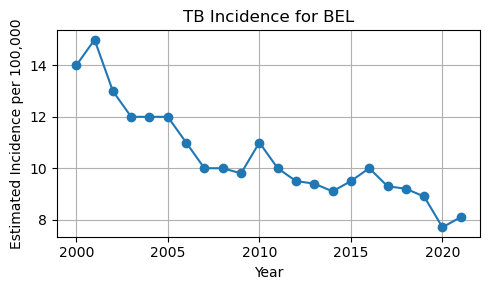

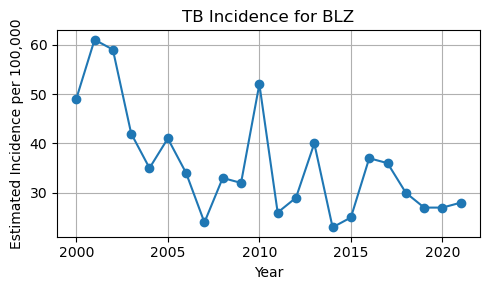

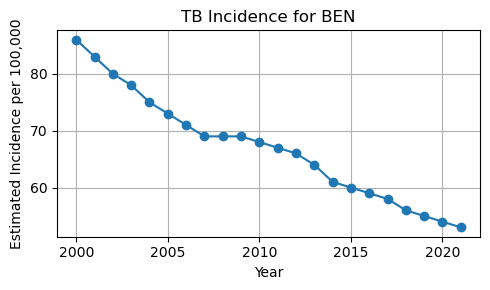

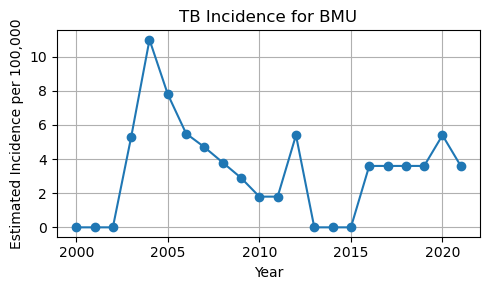

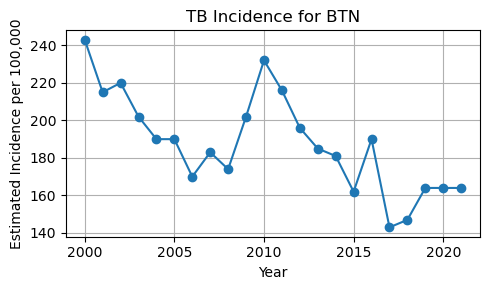

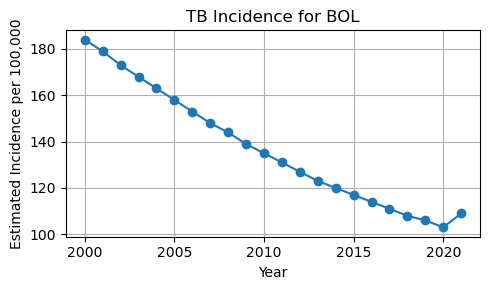

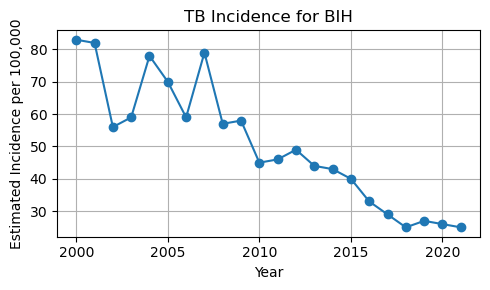

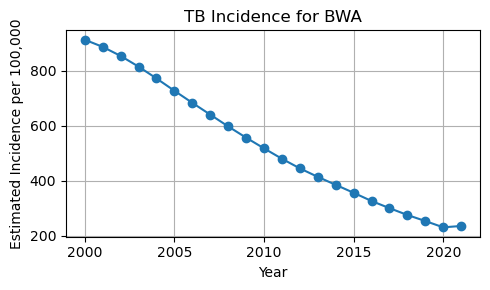

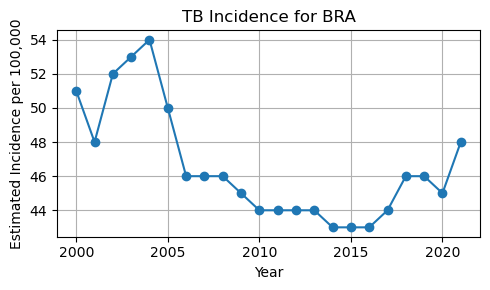

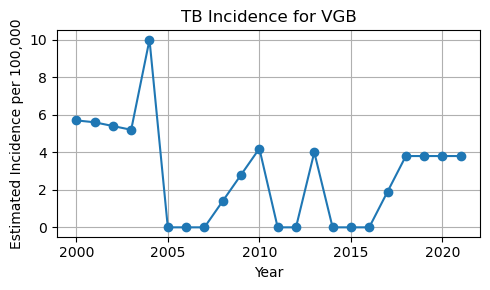

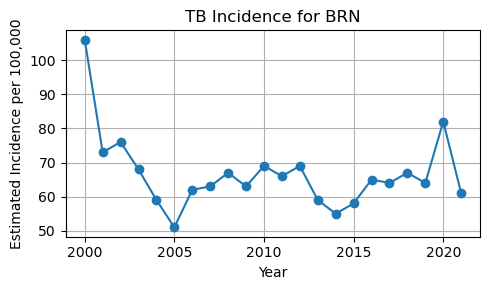

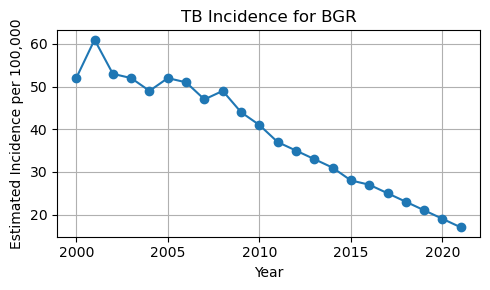

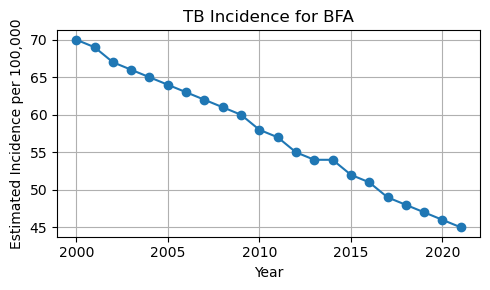

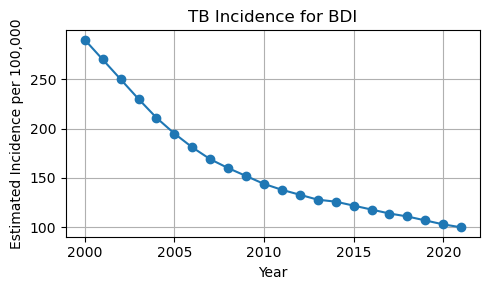

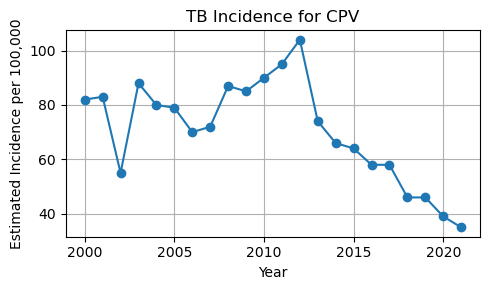

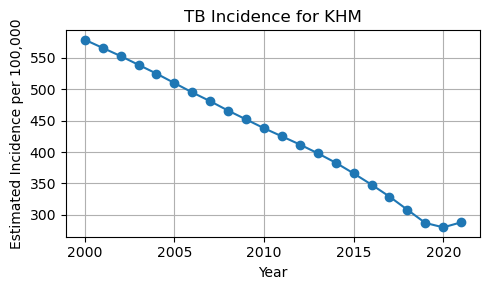

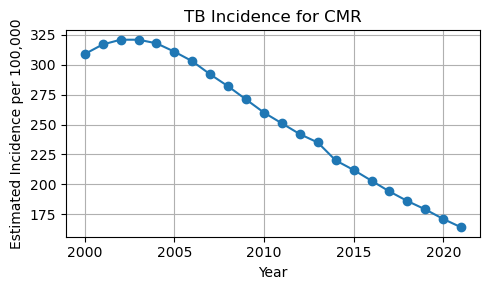

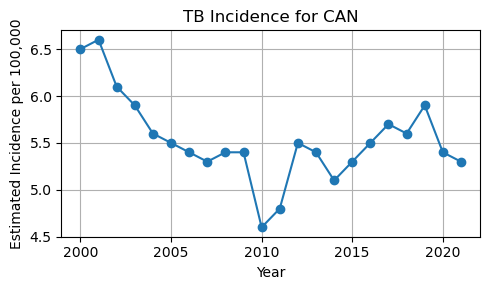

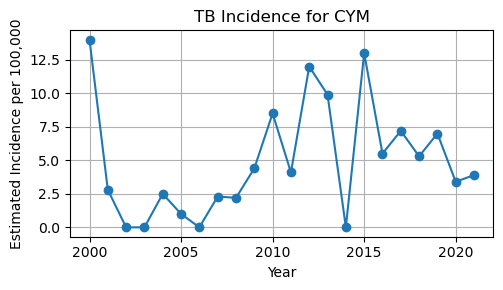

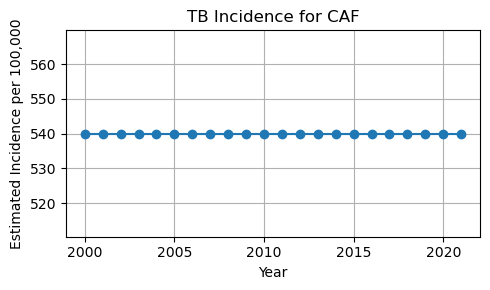

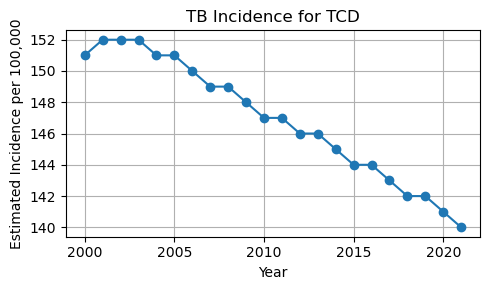

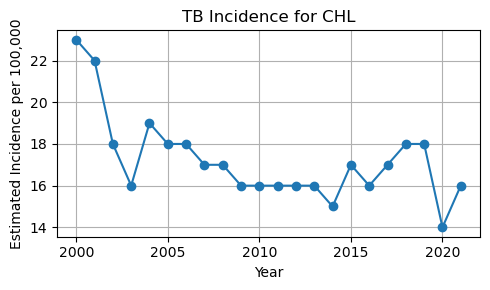

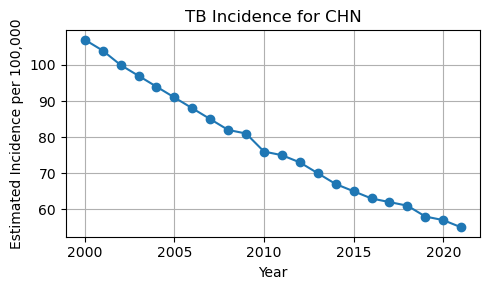

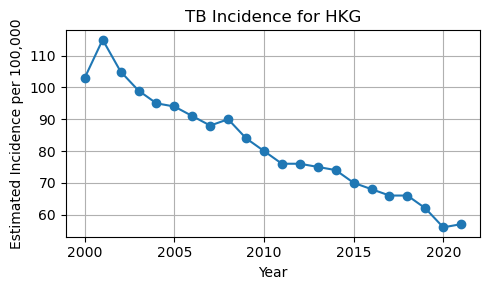

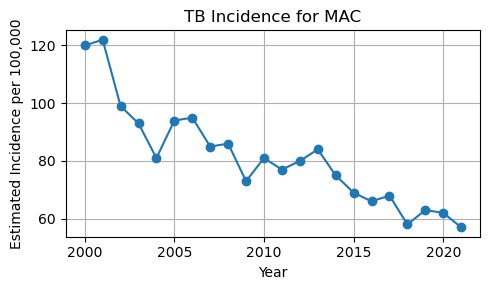

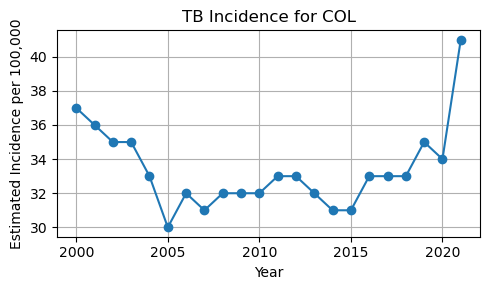

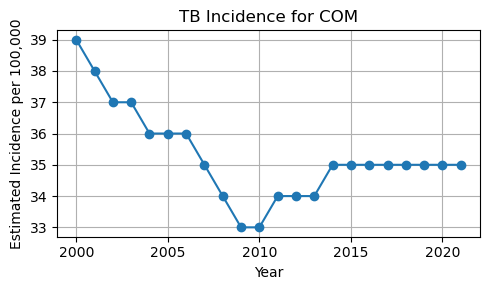

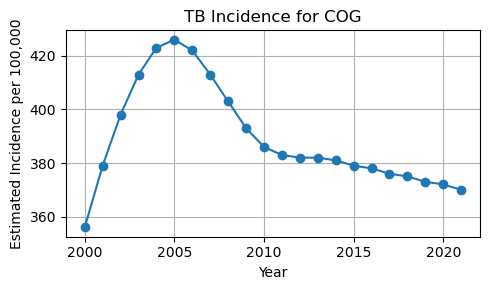

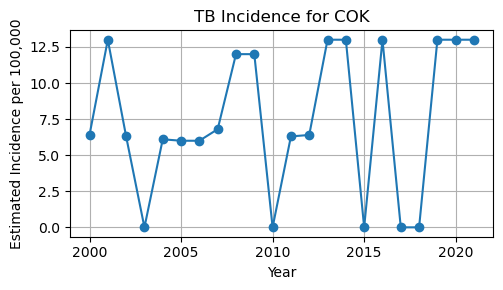

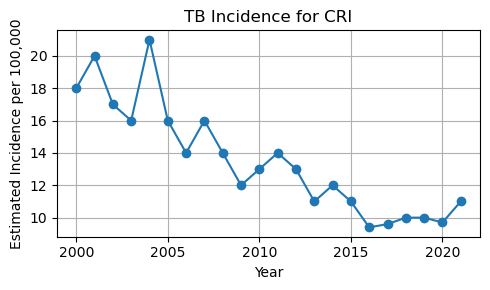

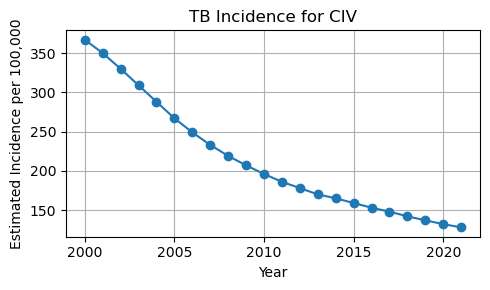

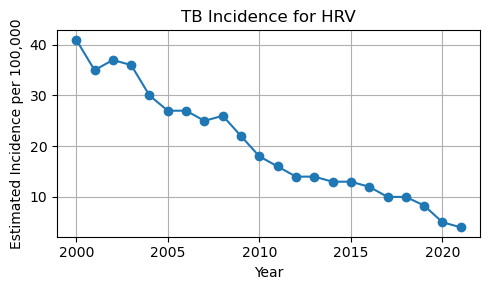

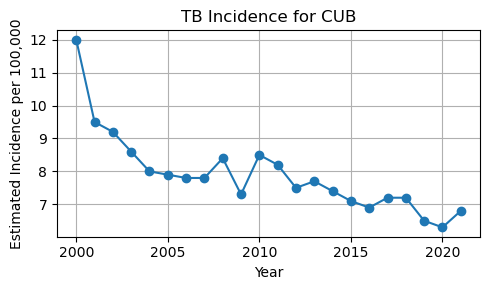

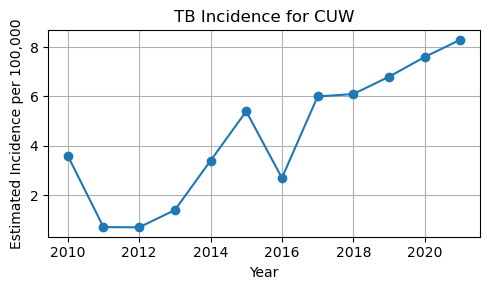

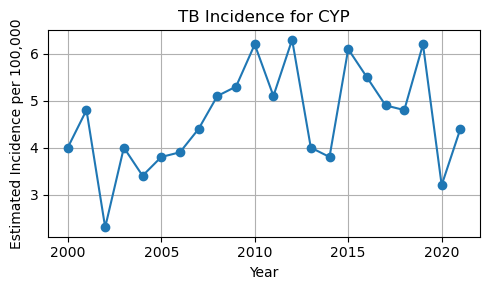

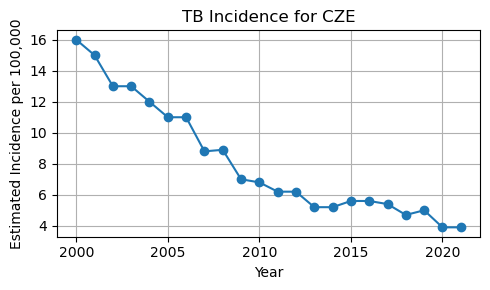

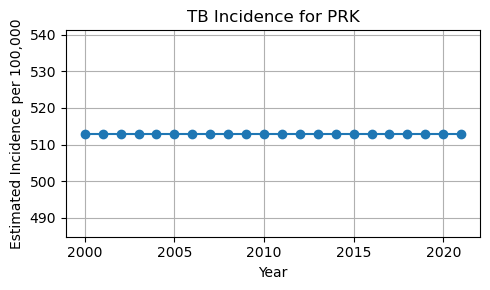

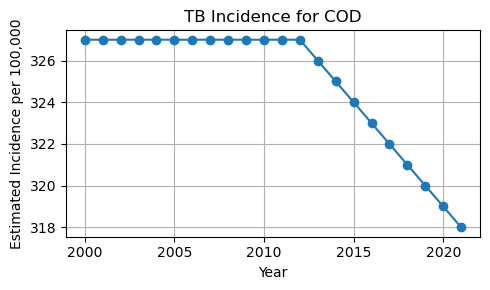

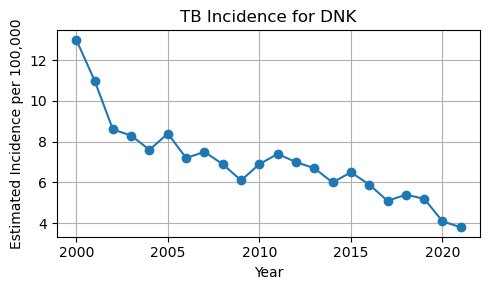

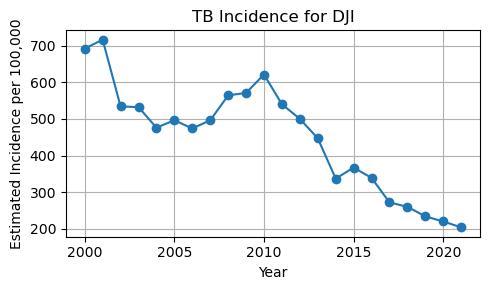

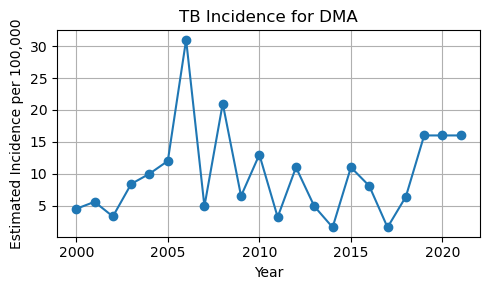

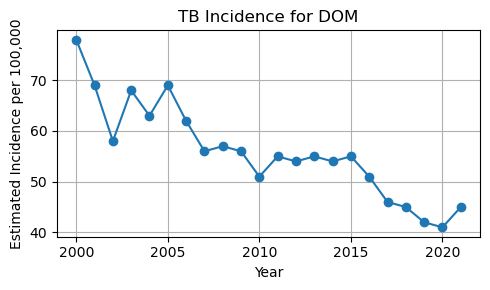

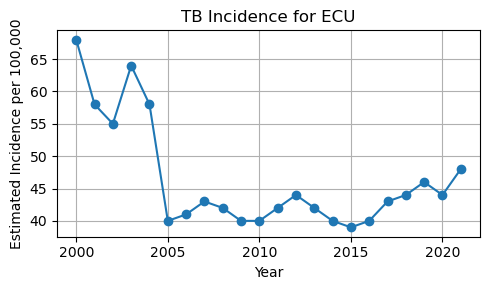

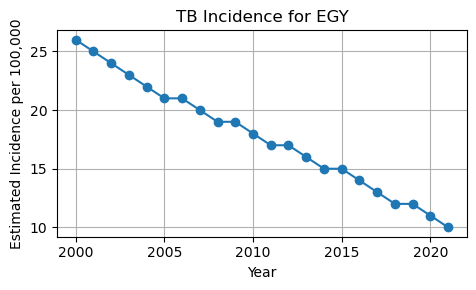

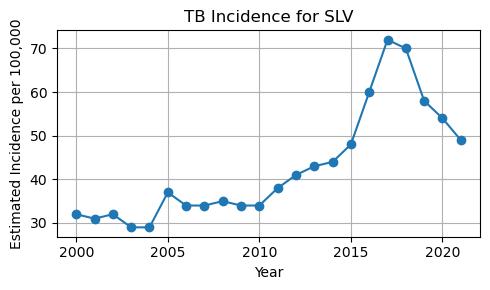

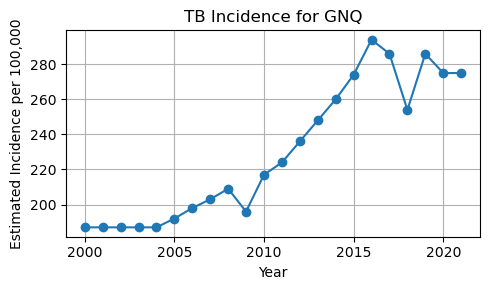

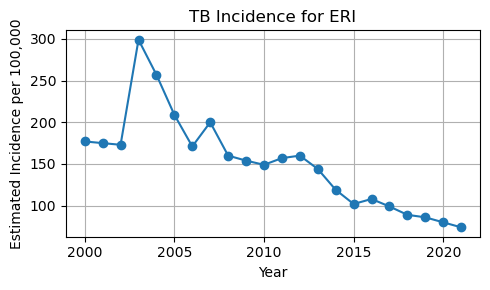

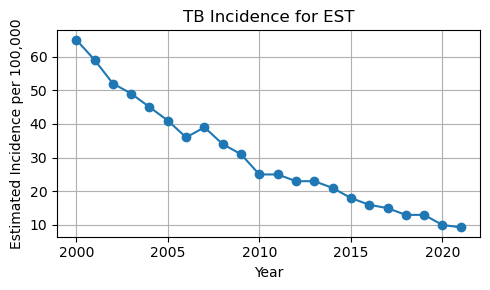

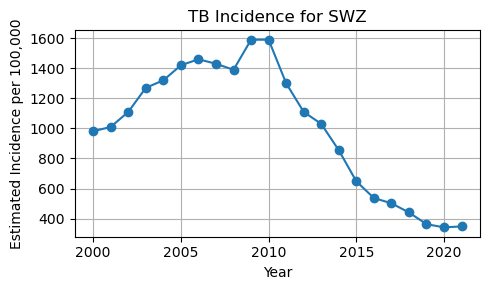

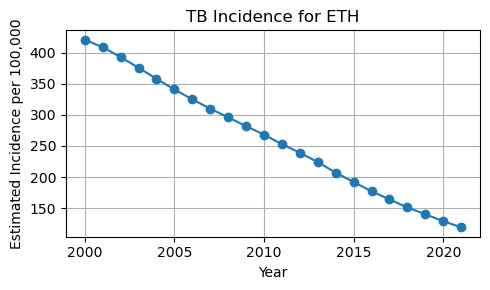

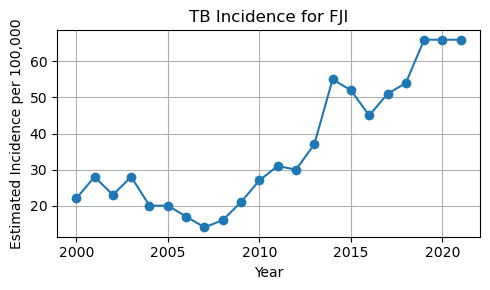

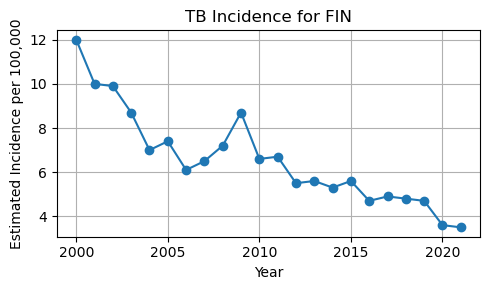

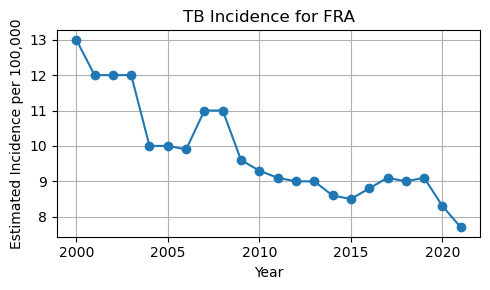

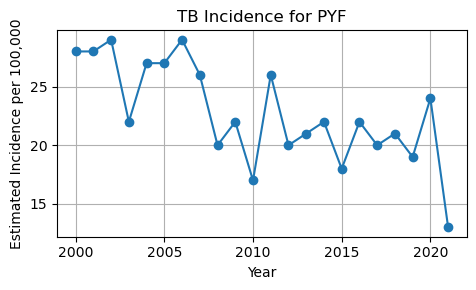

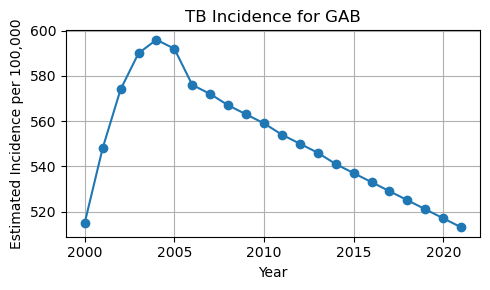

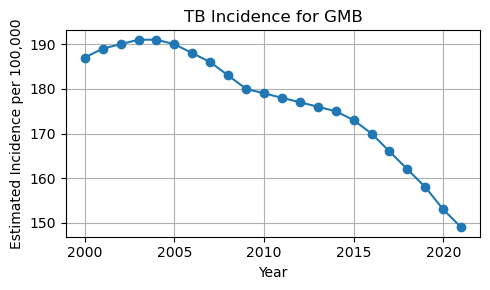

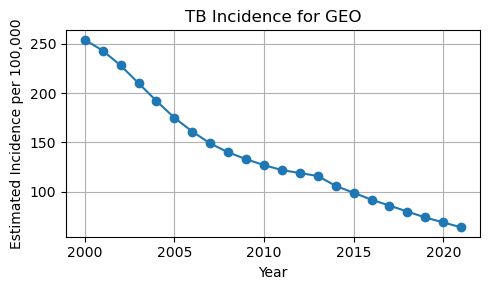

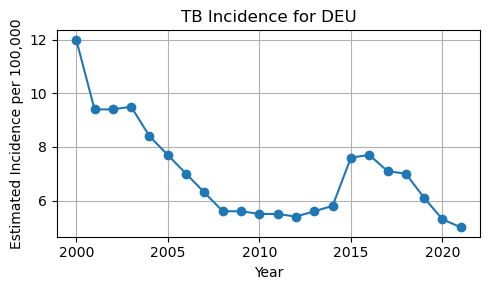

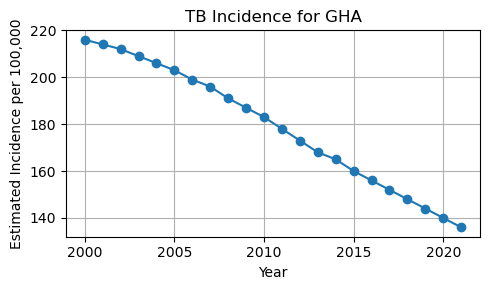

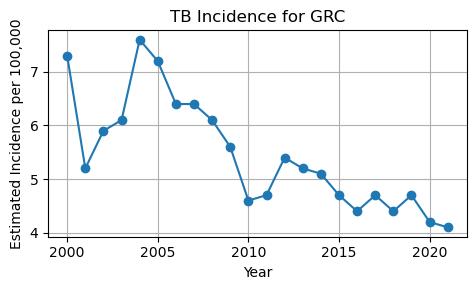

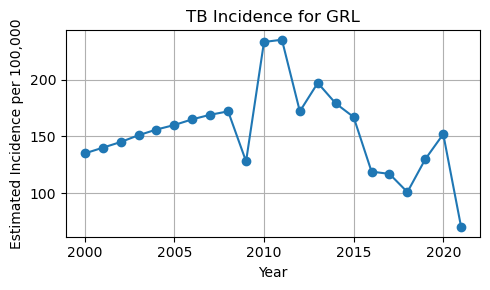

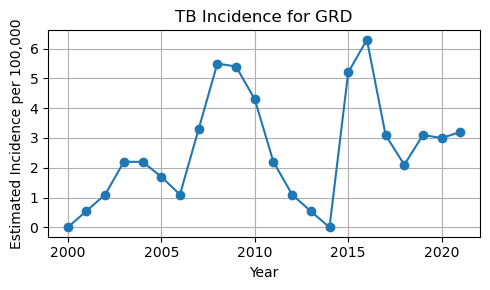

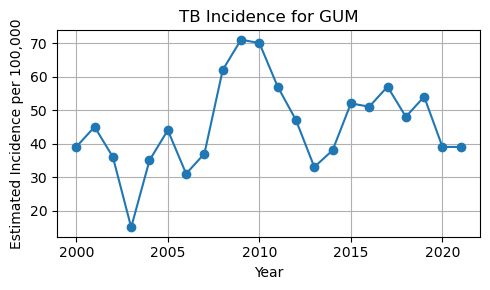

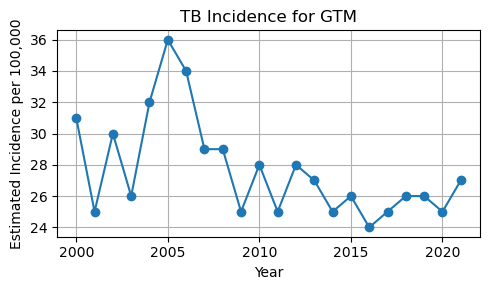

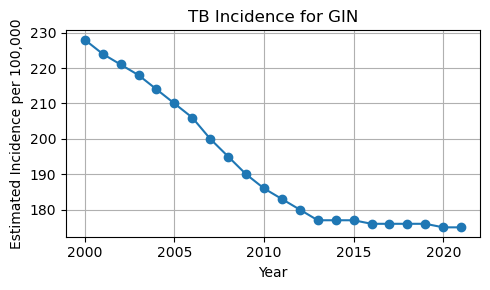

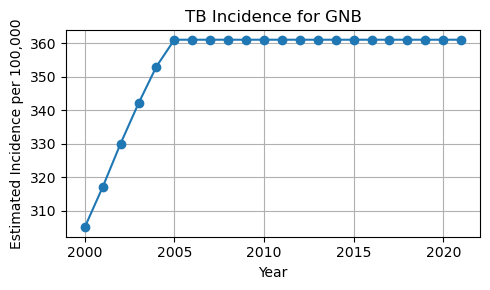

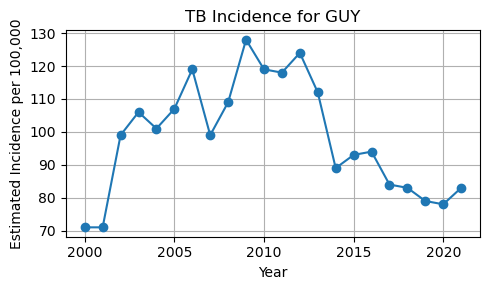

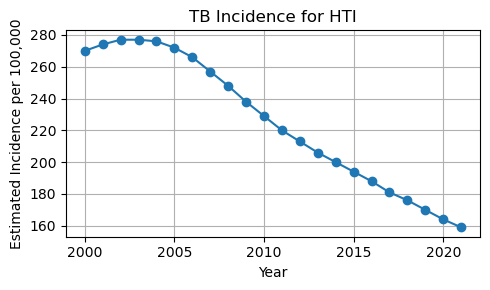

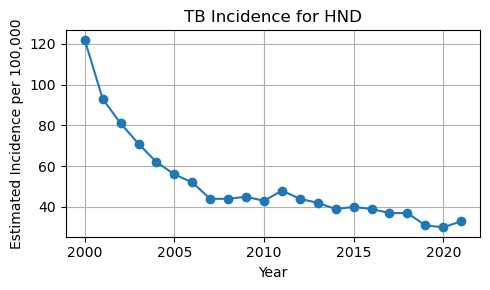

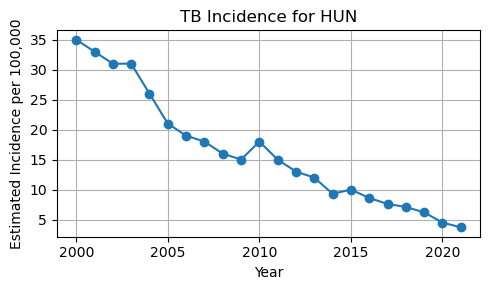

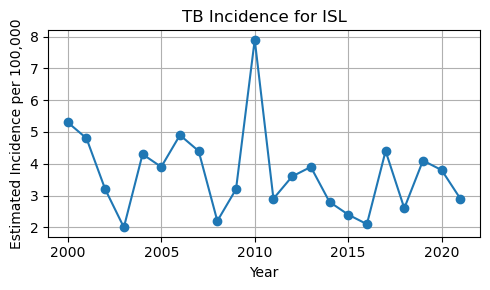

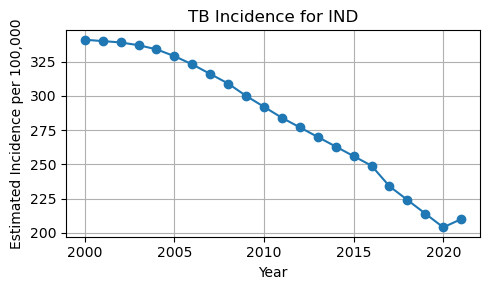

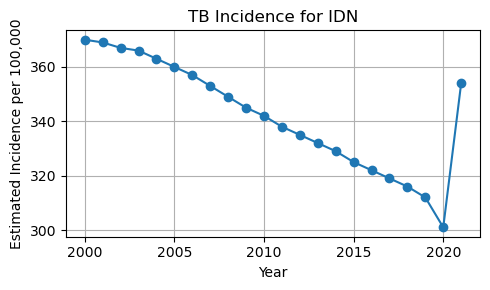

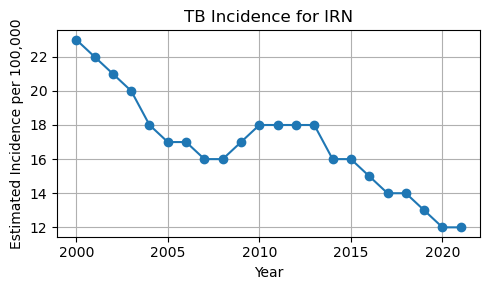

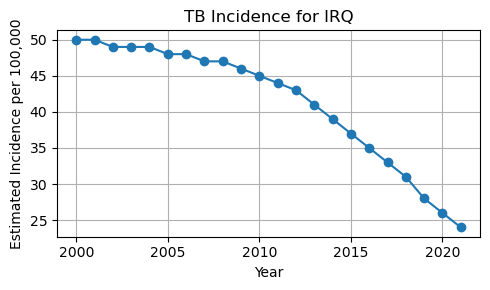

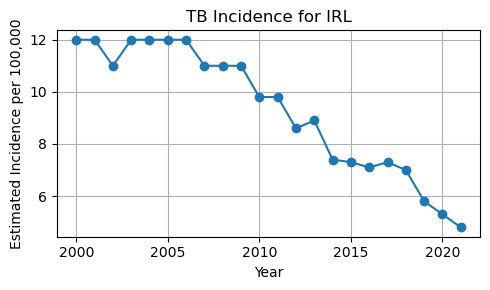

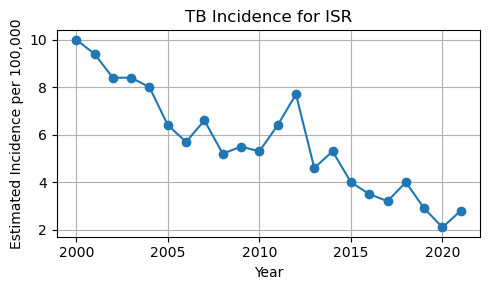

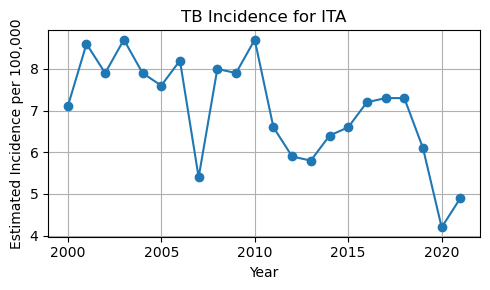

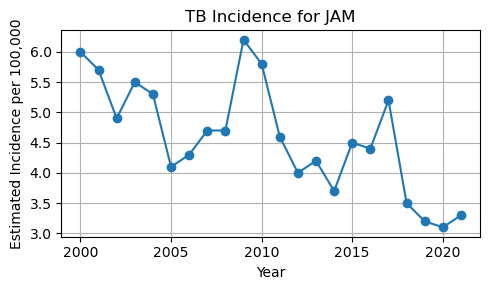

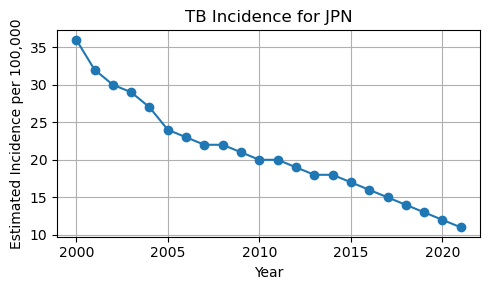

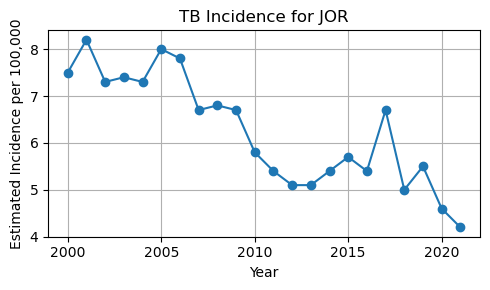

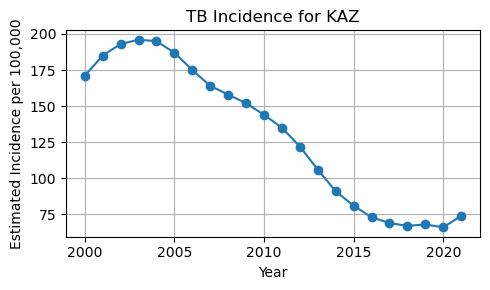

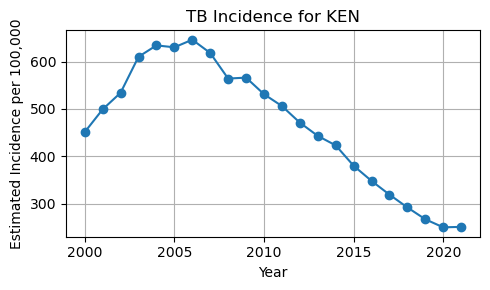

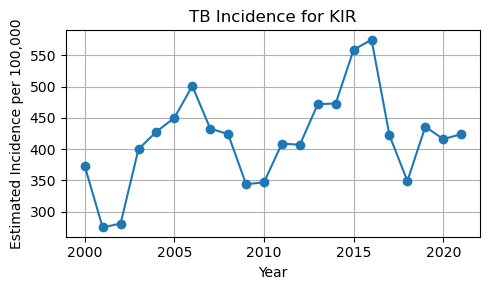

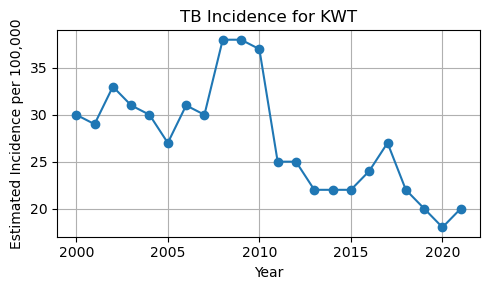

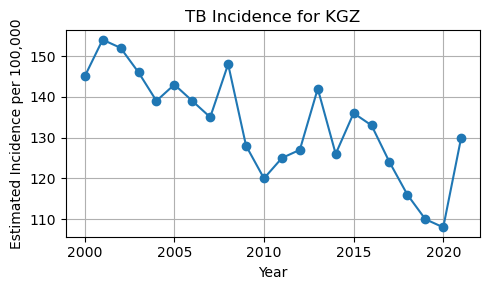

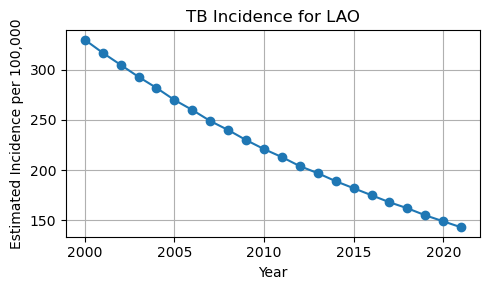

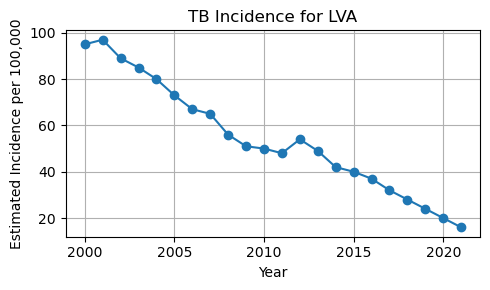

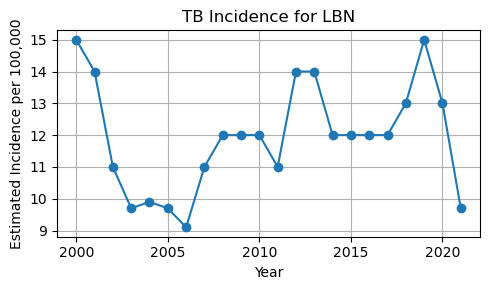

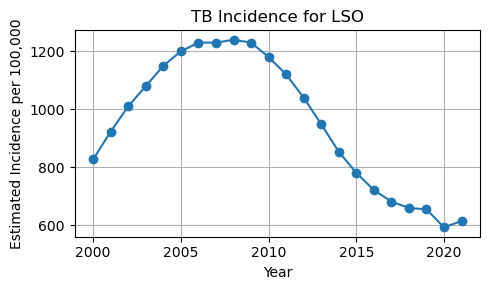

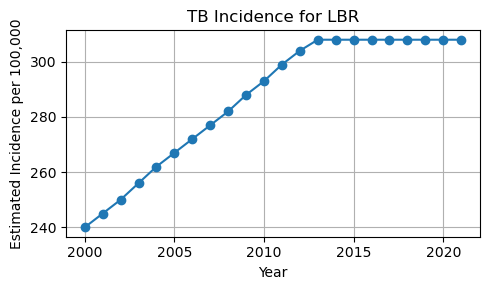

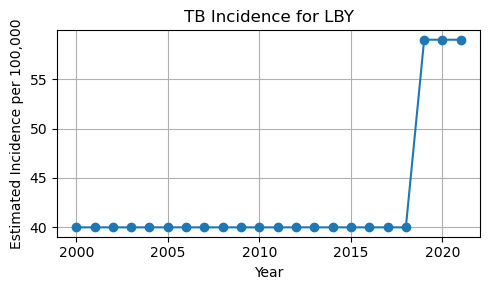

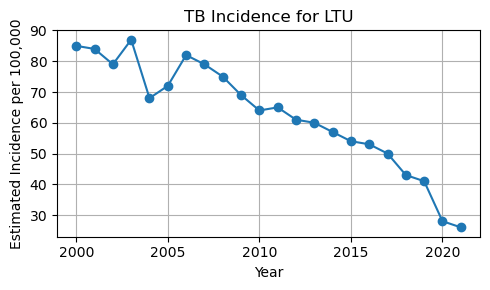

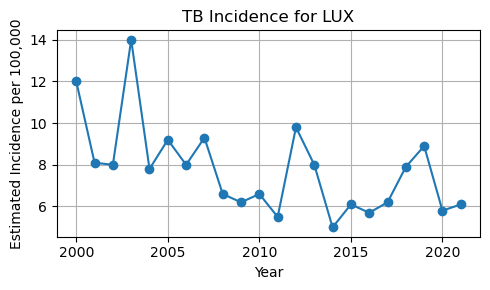

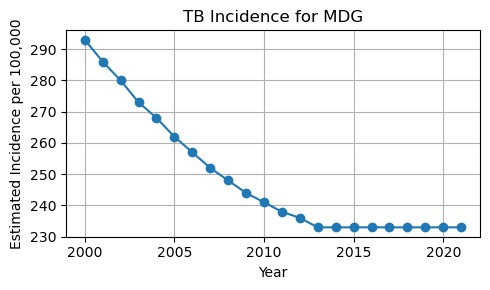

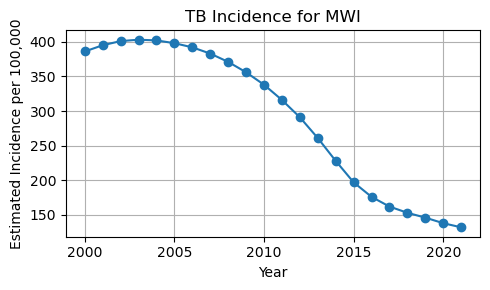

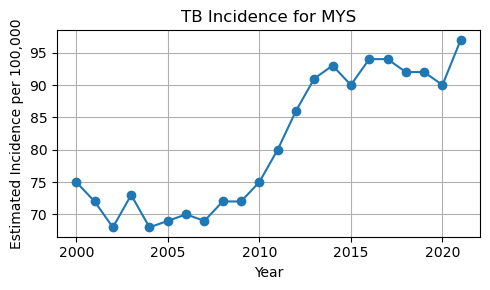

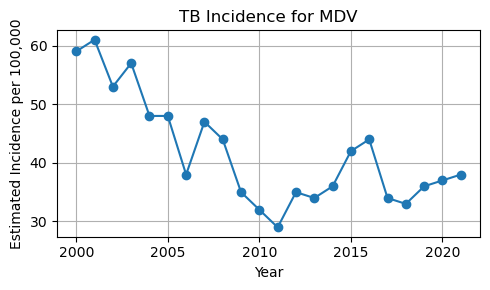

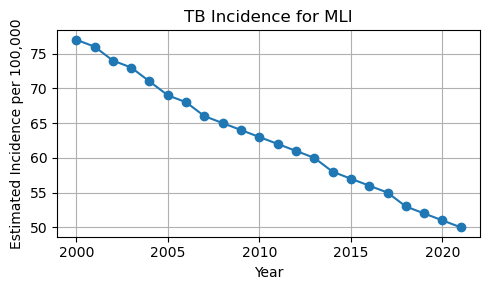

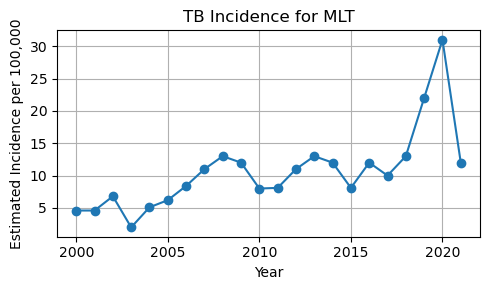

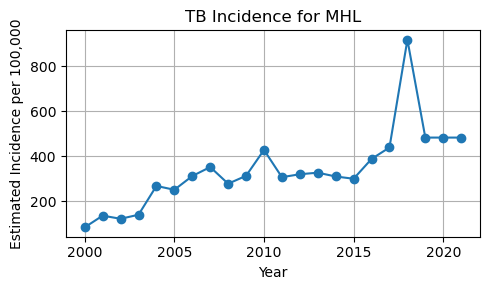

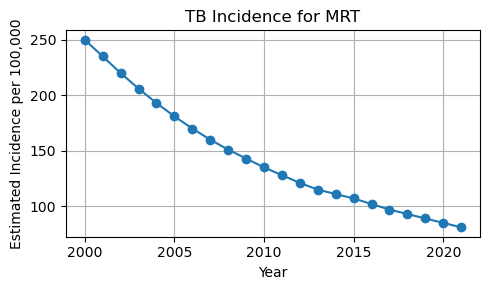

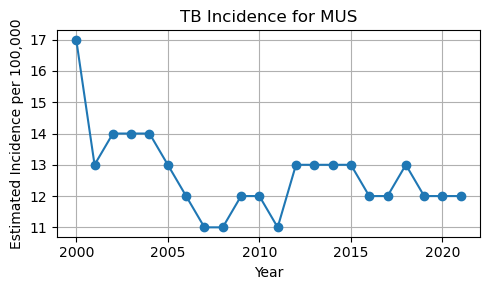

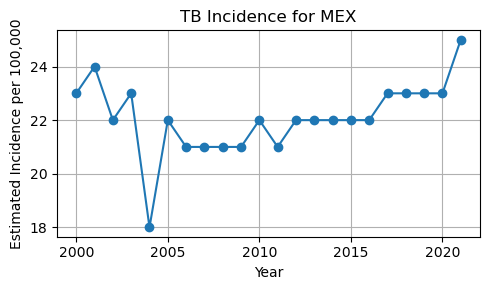

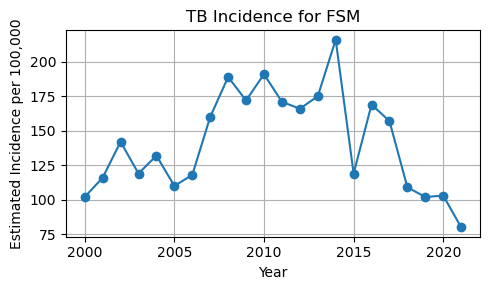

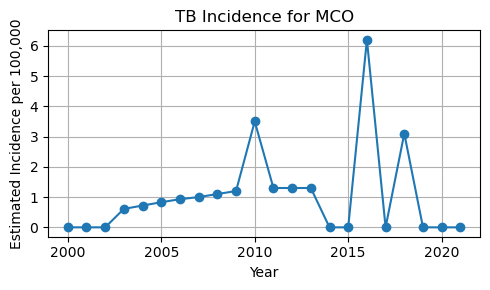

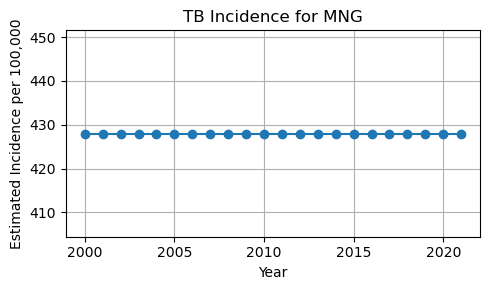

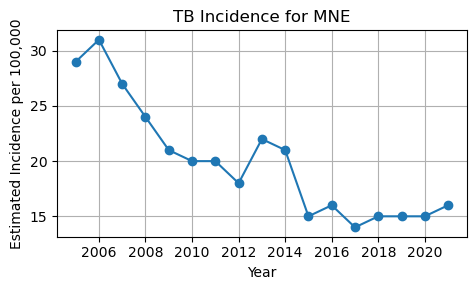

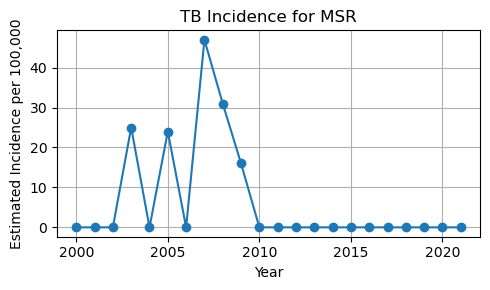

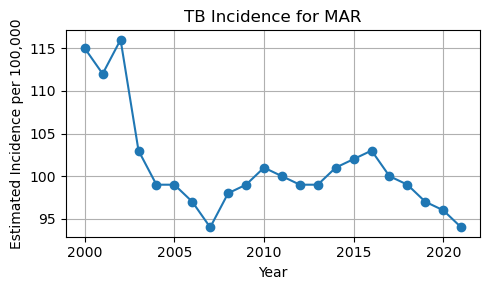

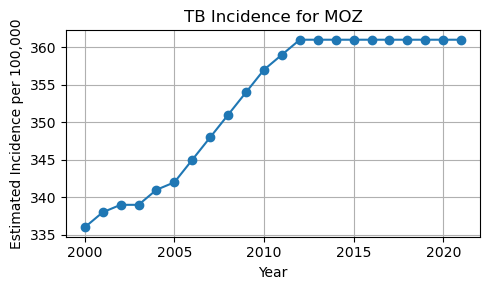

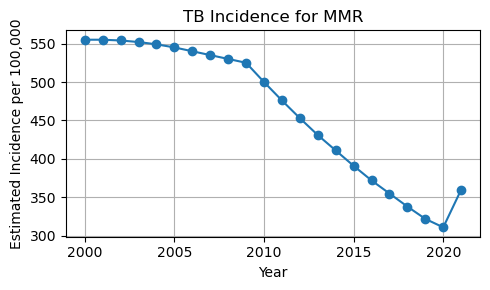

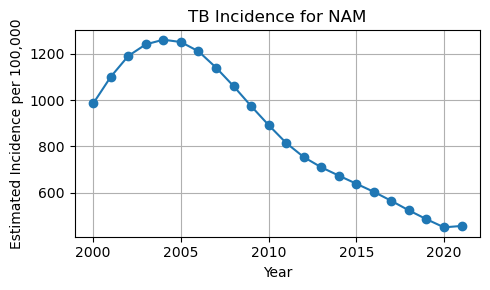

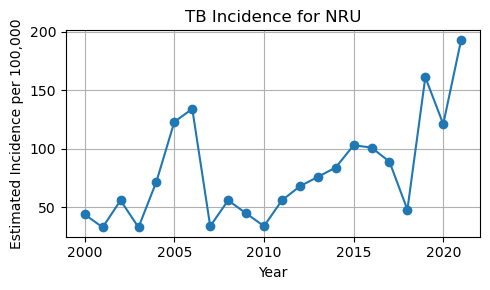

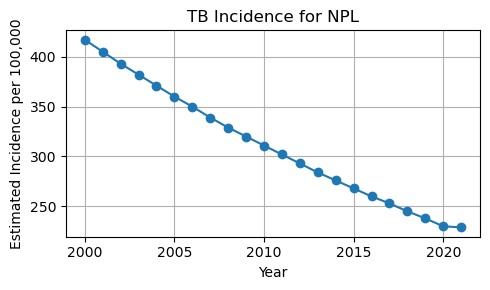

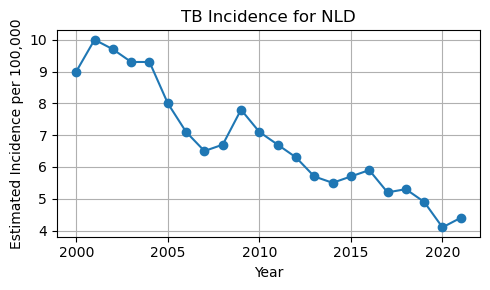

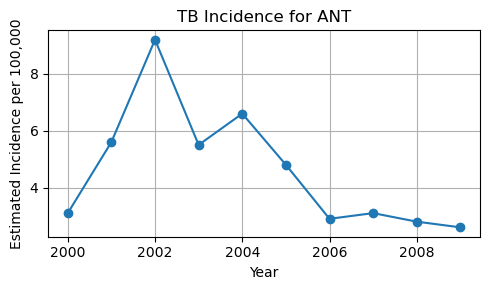

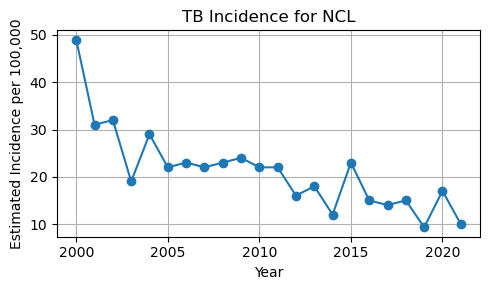

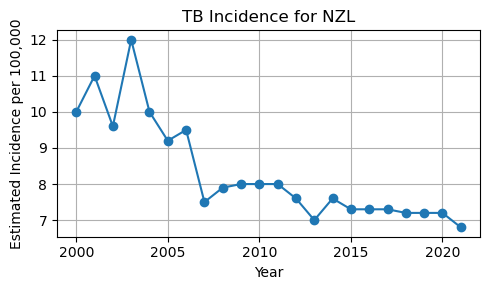

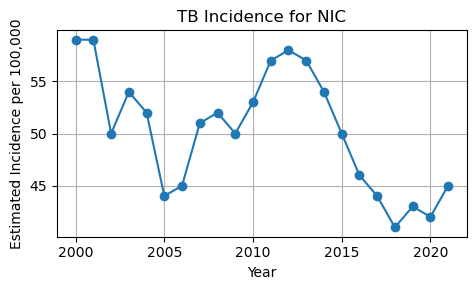

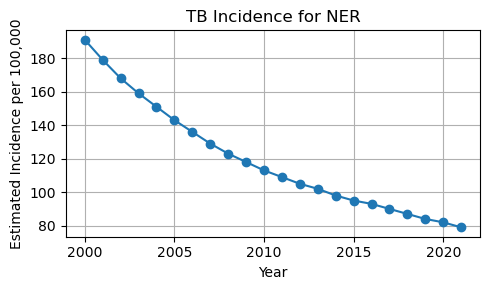

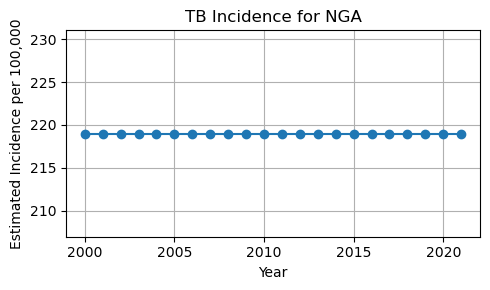

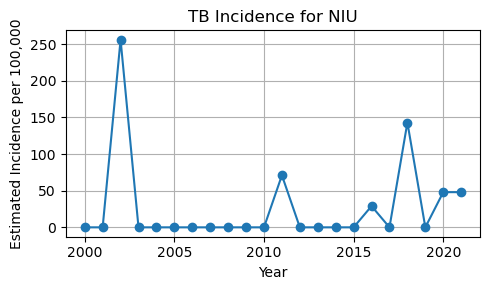

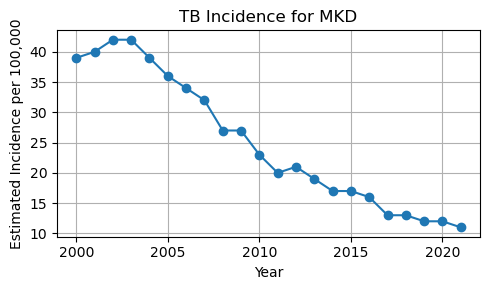

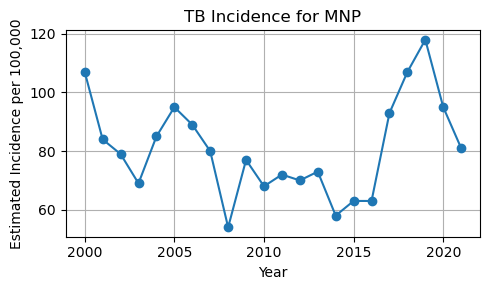

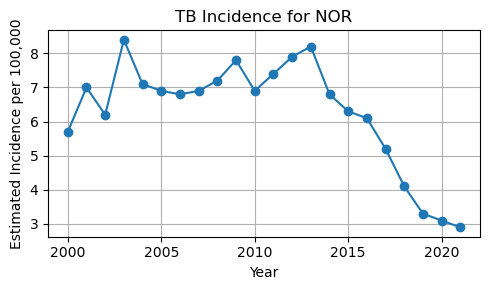

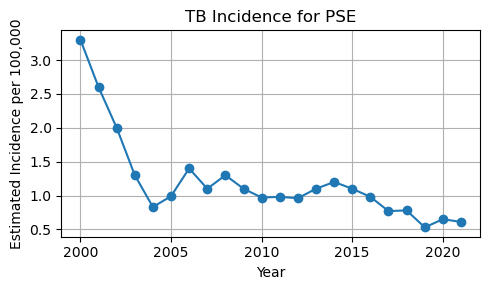

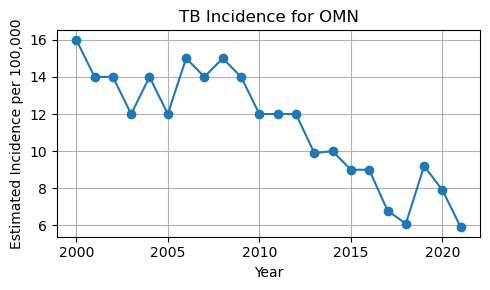

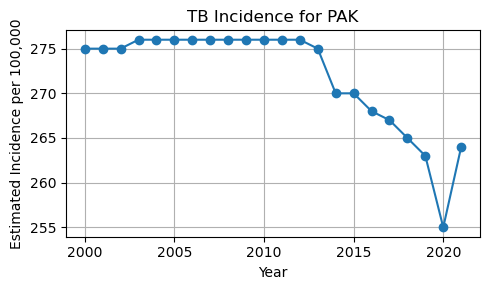

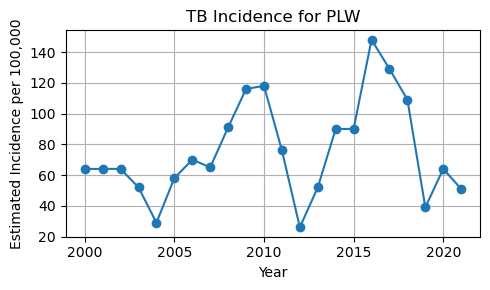

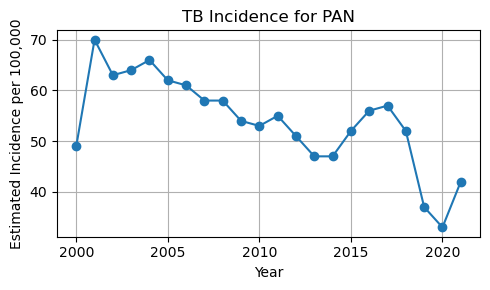

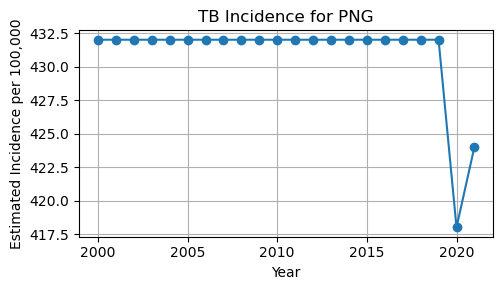

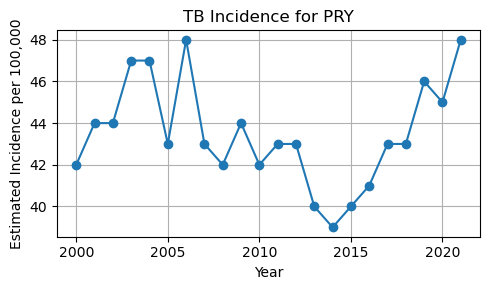

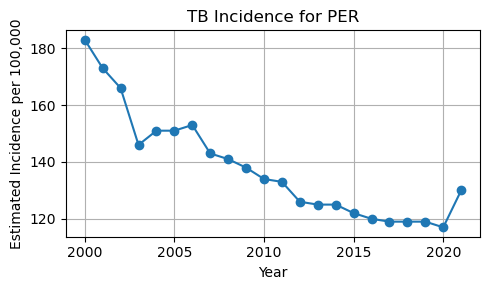

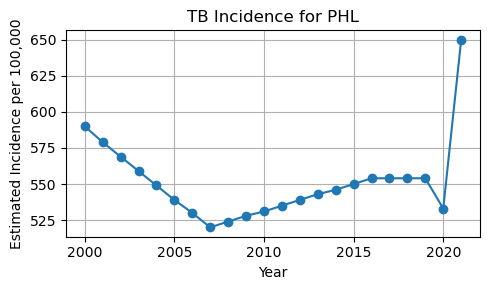

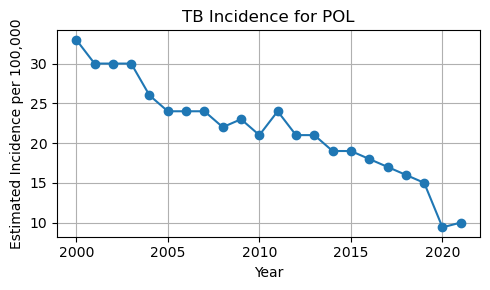

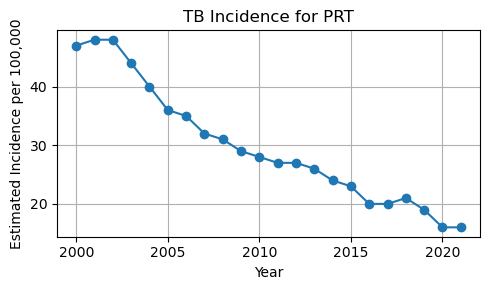

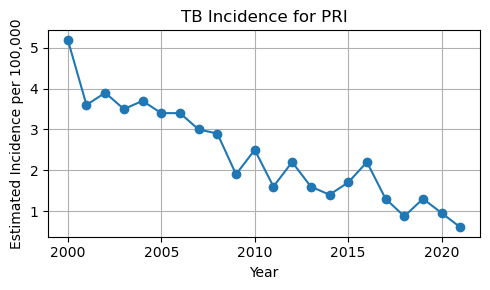

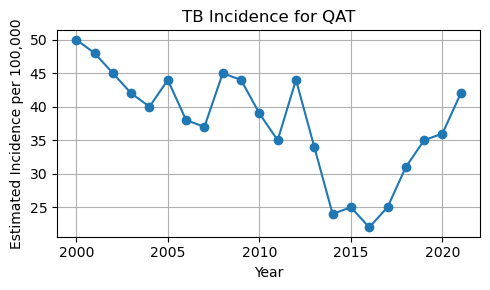

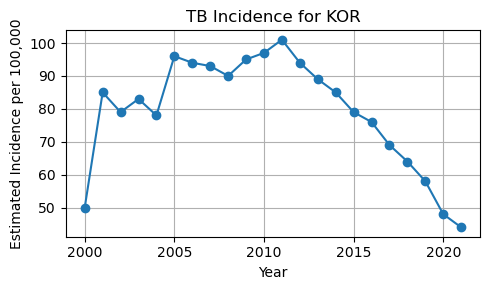

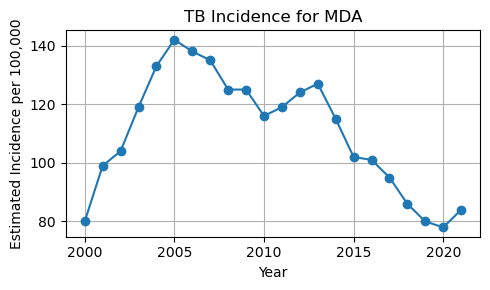

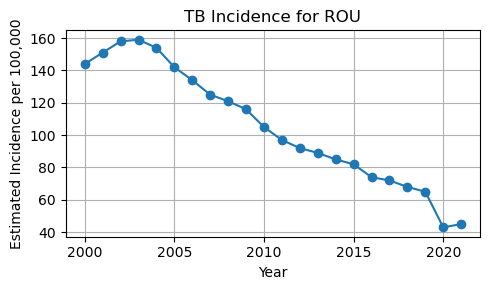

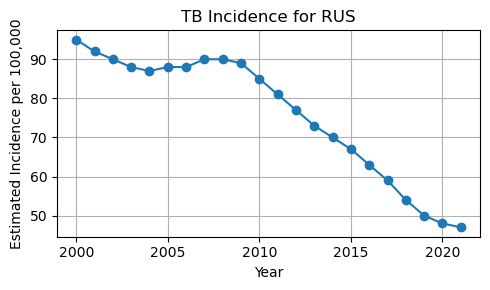

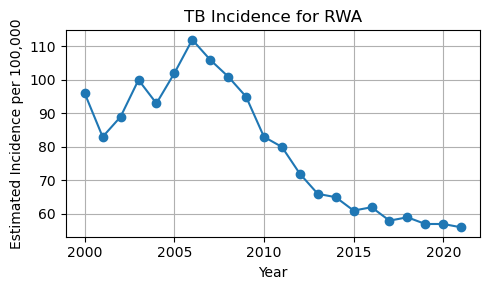

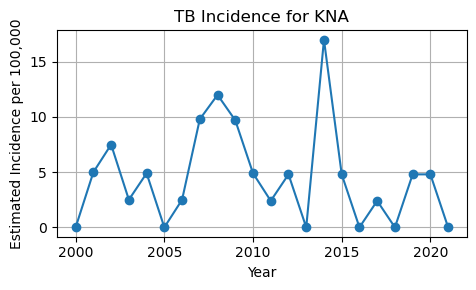

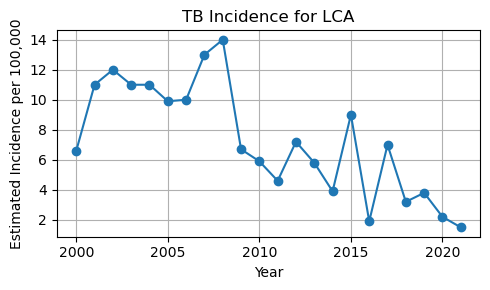

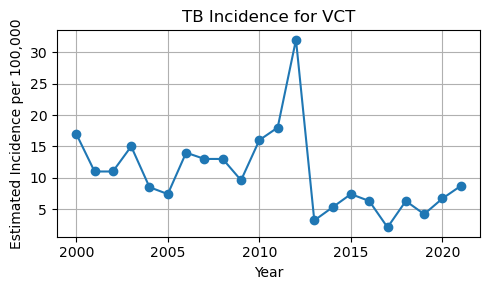

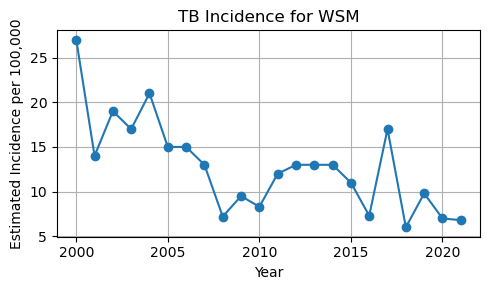

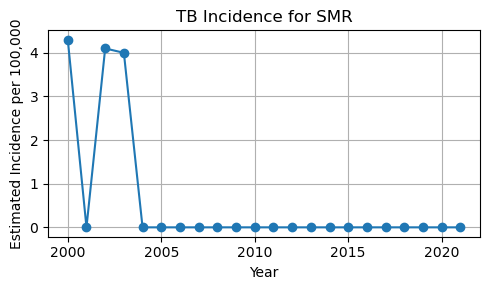

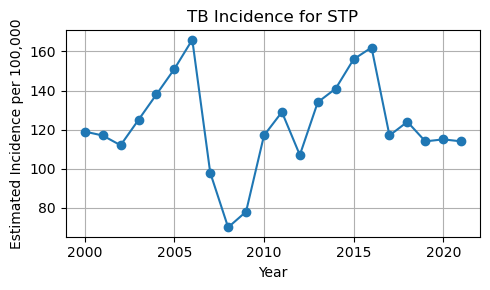

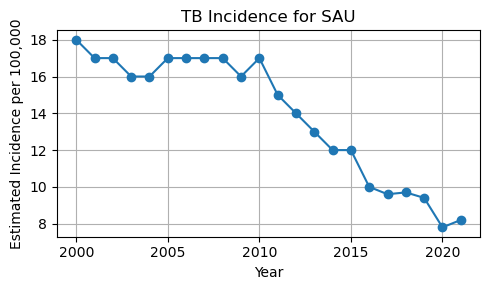

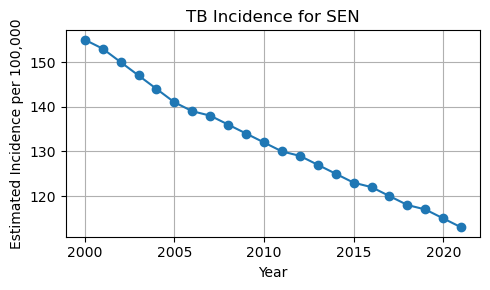

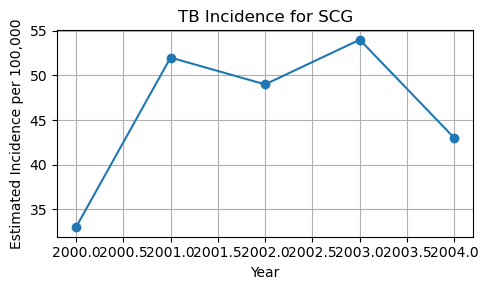

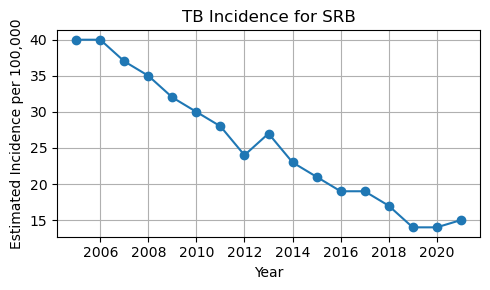

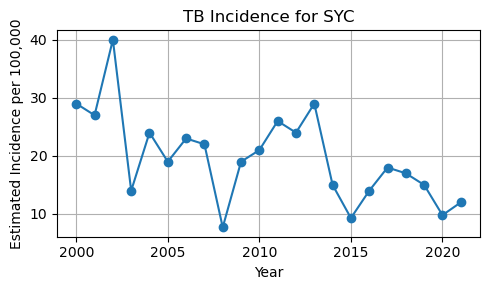

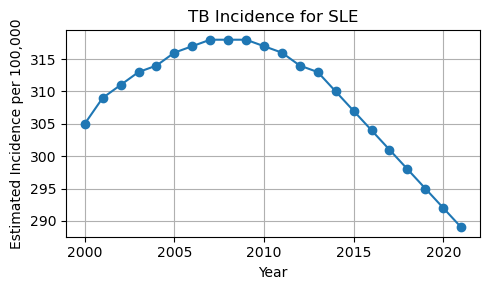

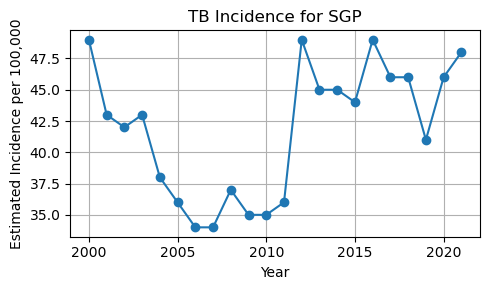

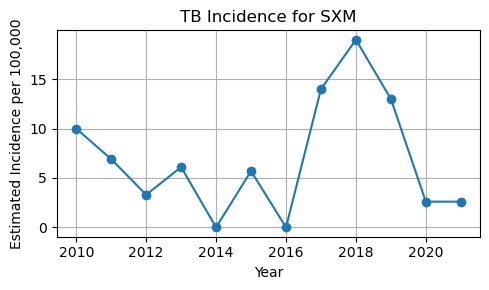

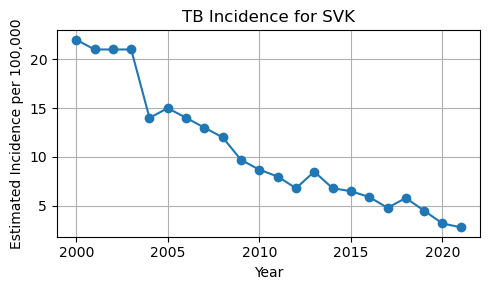

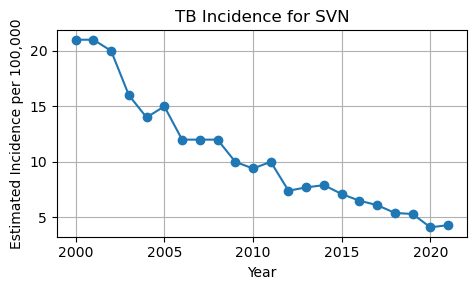

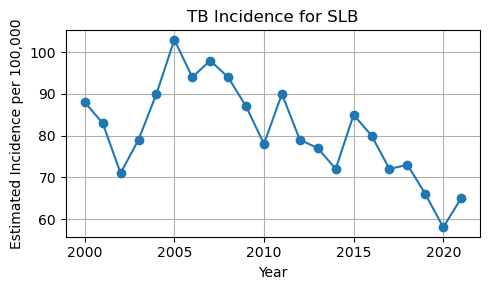

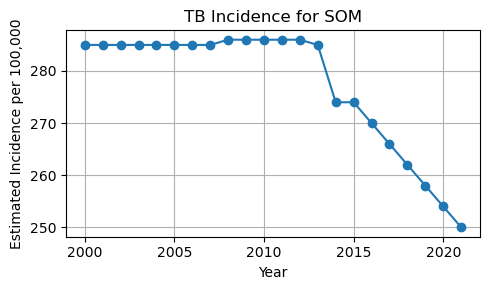

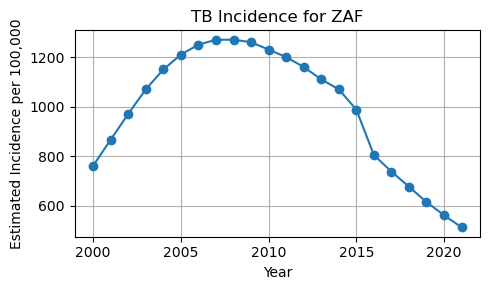

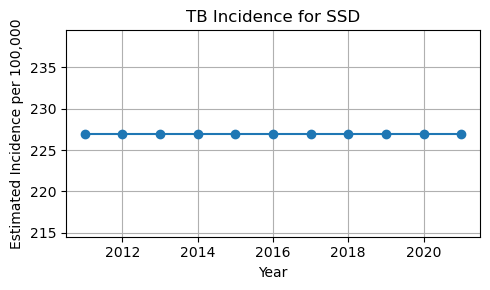

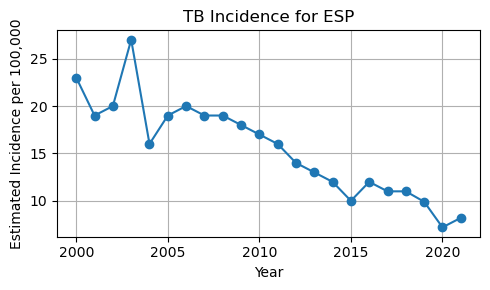

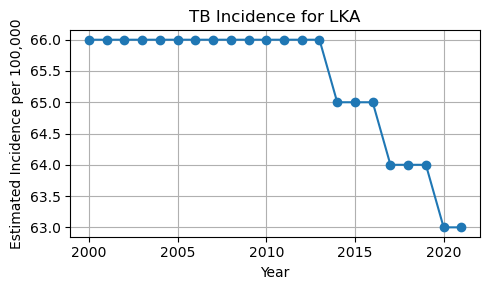

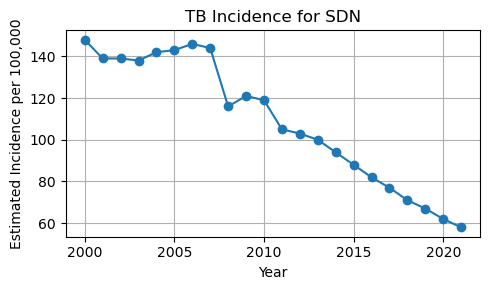

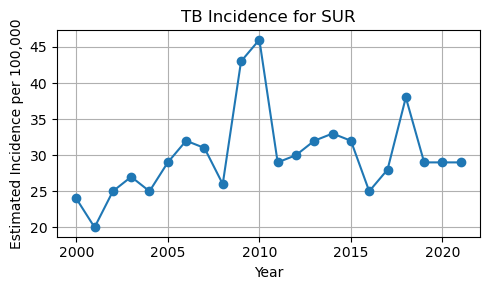

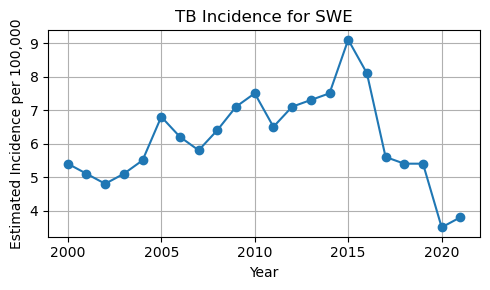

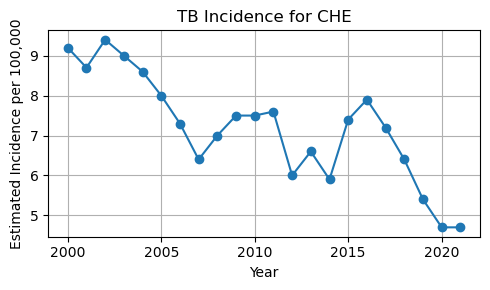

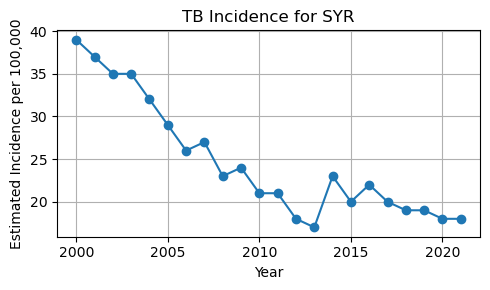

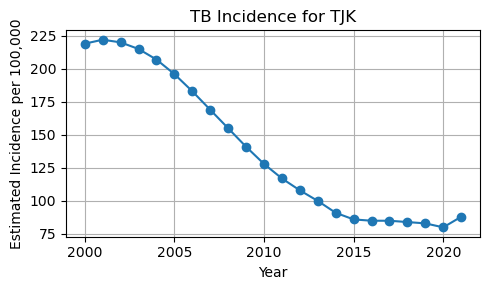

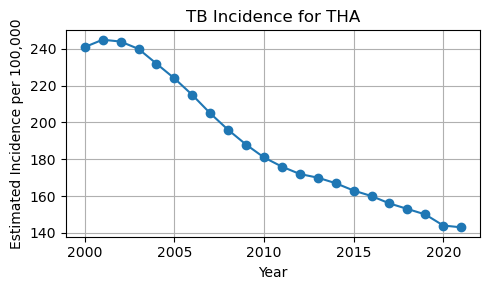

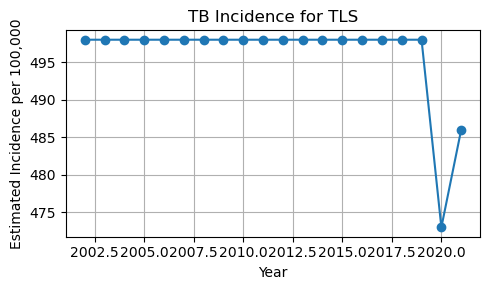

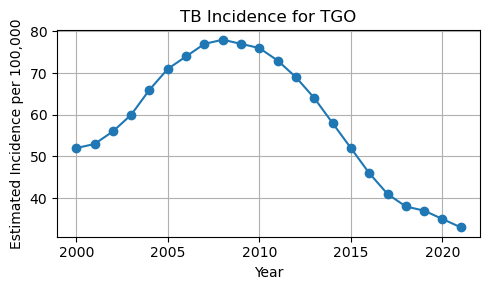

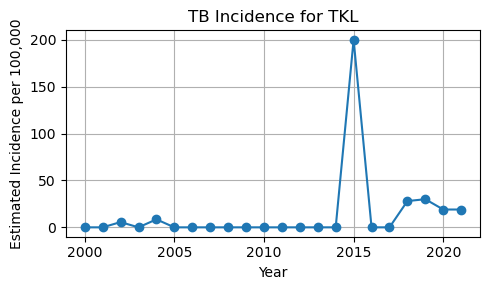

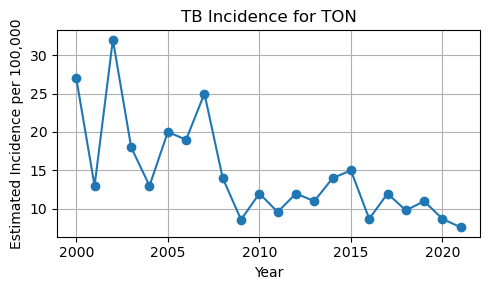

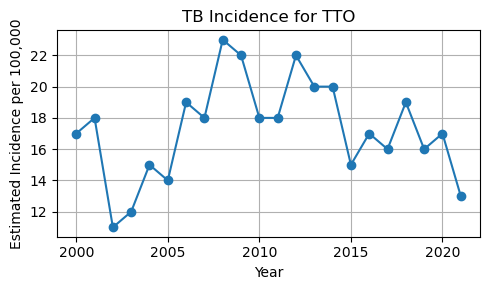

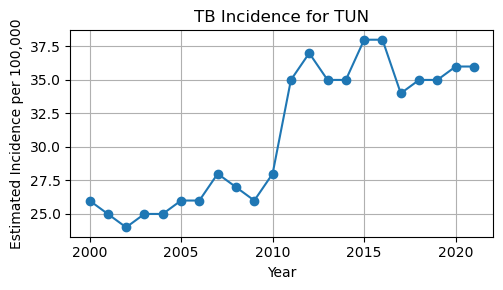

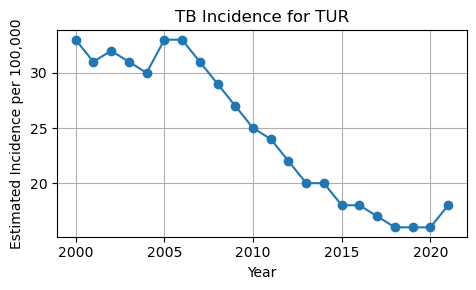

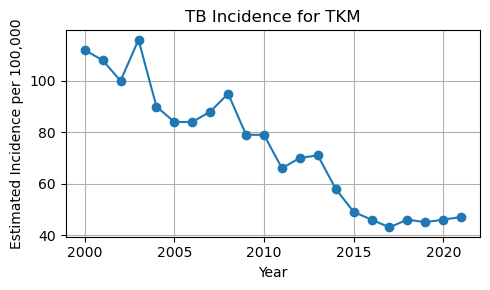

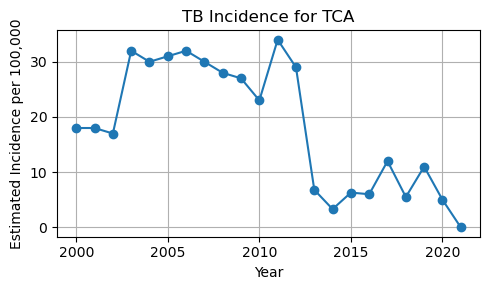

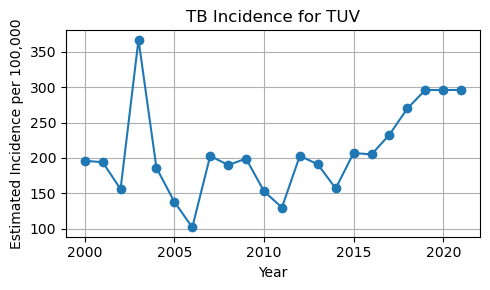

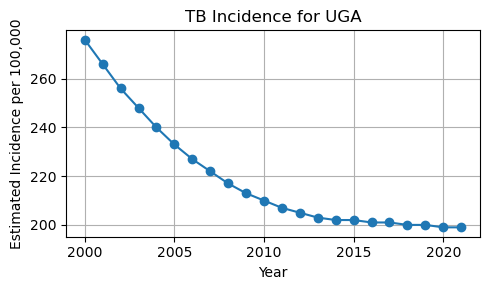

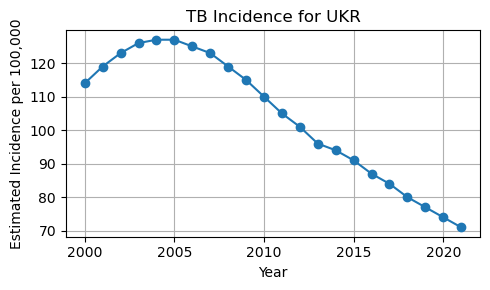

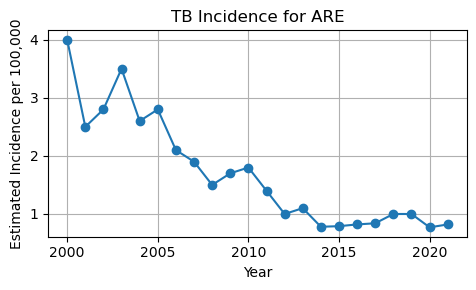

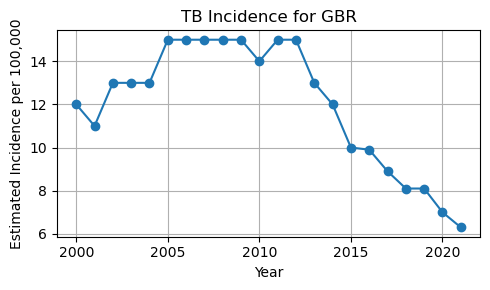

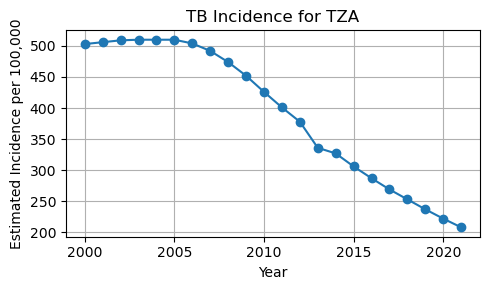

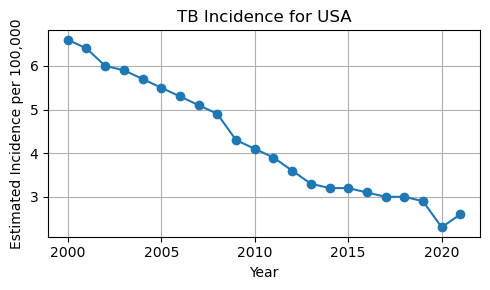

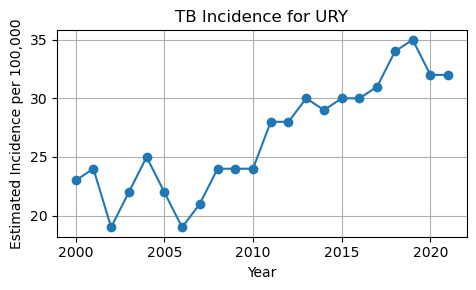

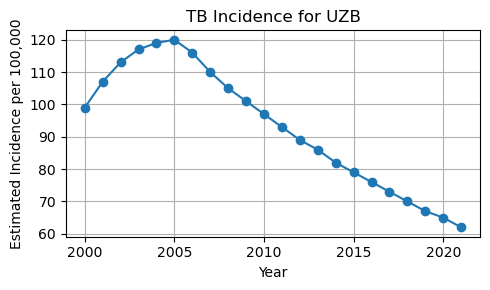

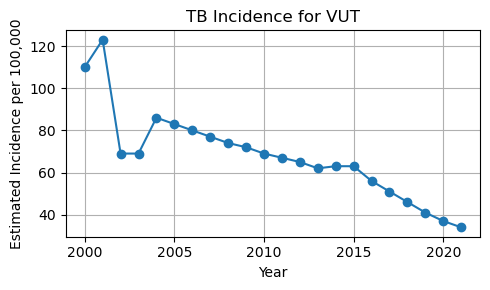

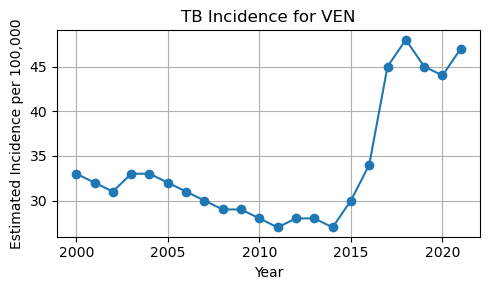

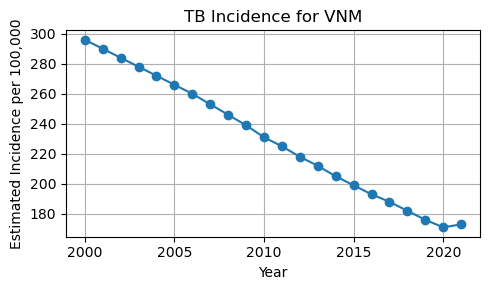

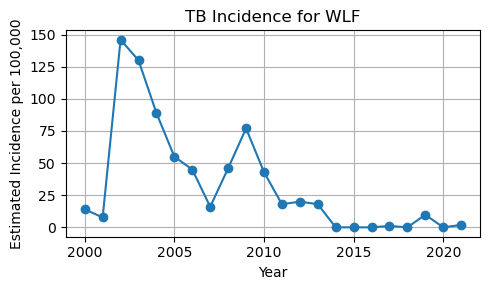

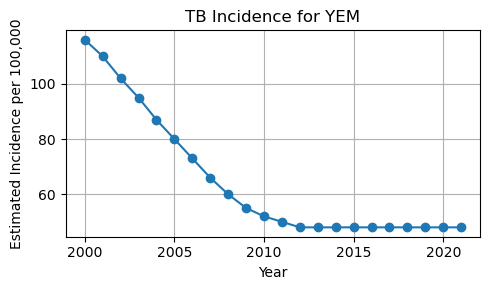

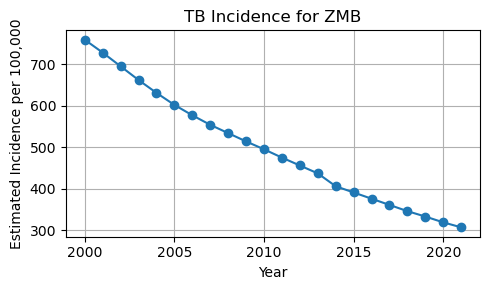

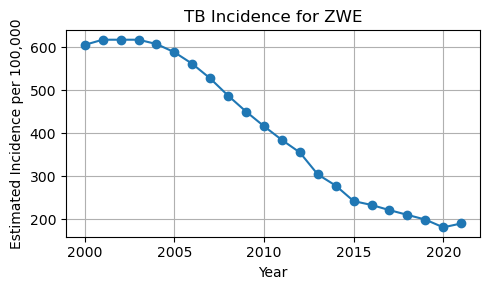

In [4]:
# Create a separate plot for each ISO 3 code
for iso3_code in unique_iso3_codes:
    # Filter data for the current ISO 3 code
    filtered_df = TBRate_df[TBRate_df['iso3'] == iso3_code]
    
    # Create a chart using matplotlib
    plt.figure(figsize=(5, 3))
    plt.plot(filtered_df['year'], filtered_df['e_inc_100k'], marker='o')

    plt.xlabel('Year')
    plt.ylabel('Estimated Incidence per 100,000')
    plt.title(f'TB Incidence for {iso3_code}')
    plt.grid(True)
    plt.tight_layout()

    # Display the chart
    plt.show()

In [5]:
# Get unique WHO Region codes
unique_whoregion_codes = TBRate_df['g_whoregion'].unique()

# Read ISO3 Codes
print(unique_whoregion_codes)

['EMR' 'EUR' 'AFR' 'WPR' 'AMR' 'SEA']


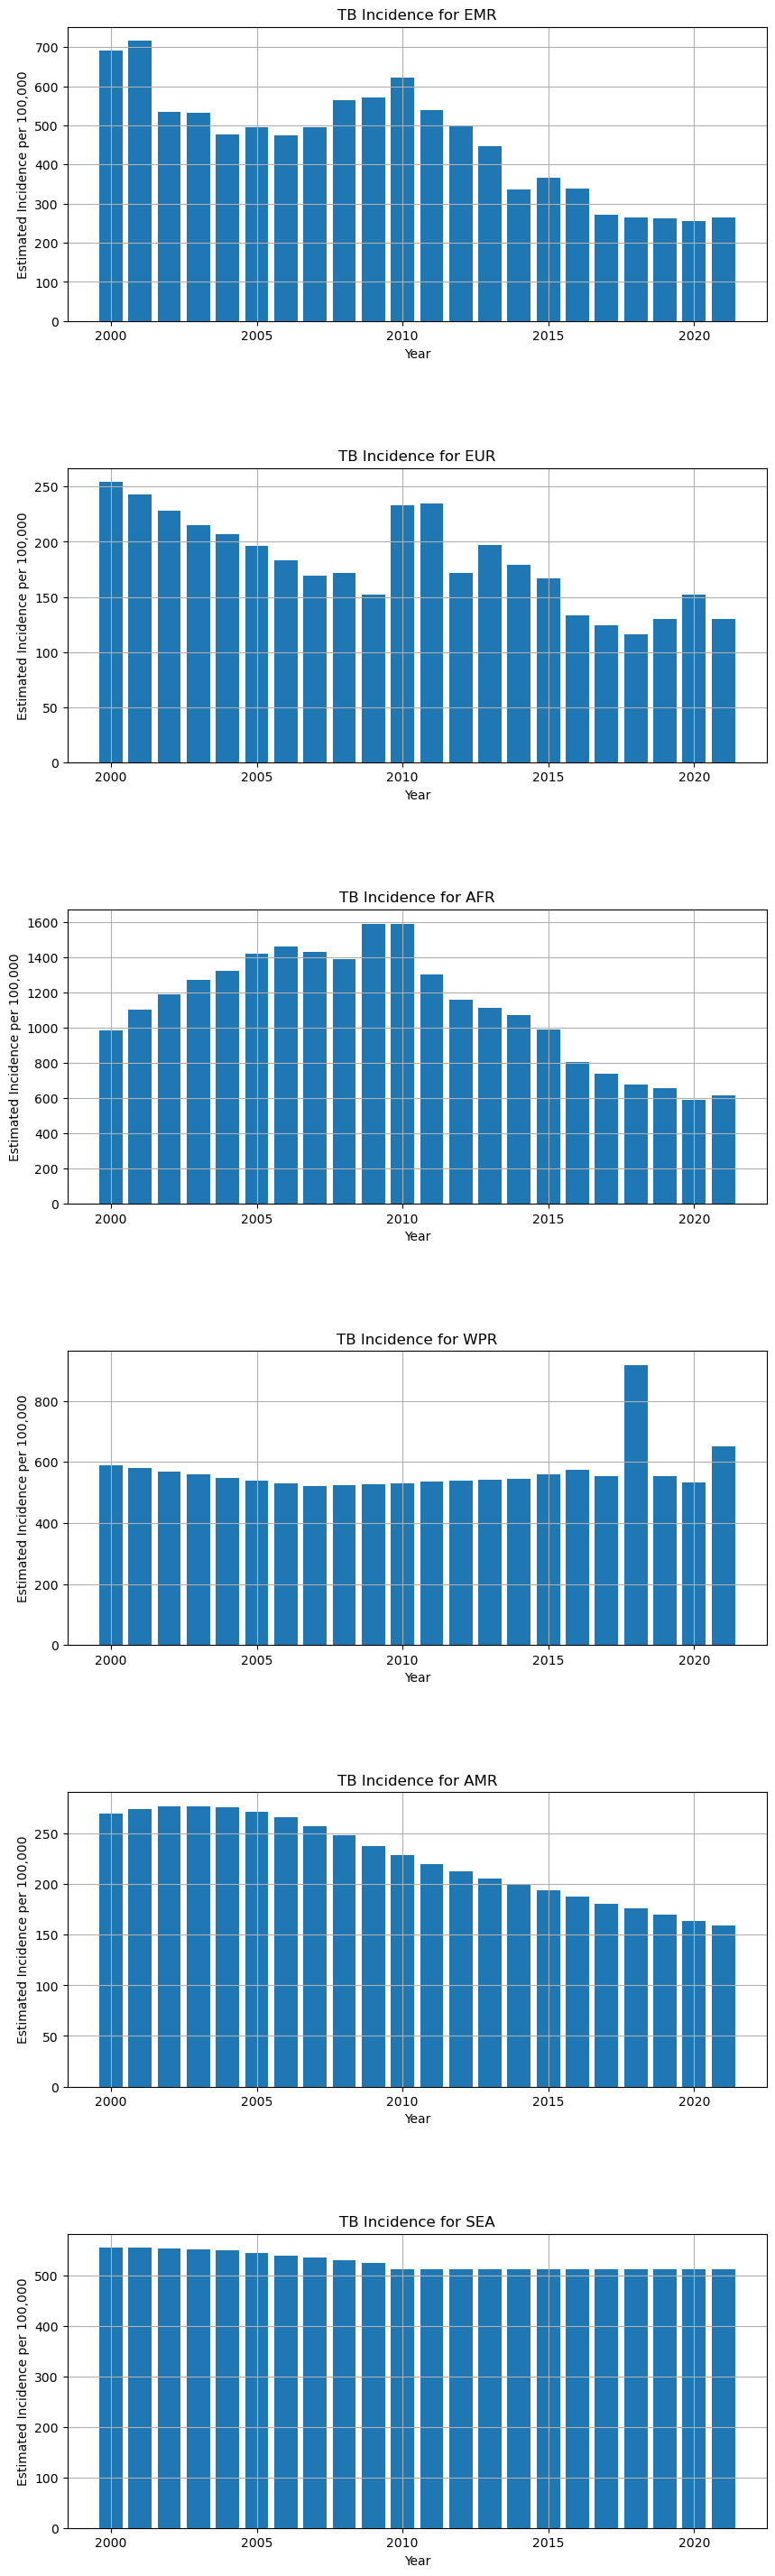

In [6]:
# Get unique WHO Region codes
unique_whoregion_codes = TBRate_df['g_whoregion'].unique()

# Create subplots for each WHO Region code
fig, axes = plt.subplots(nrows=len(unique_whoregion_codes), ncols=1, figsize=(10, 6*len(unique_whoregion_codes)))

# Iterate through each WHO Region code and create a subplot
for i, whoregion_code in enumerate(unique_whoregion_codes):
    # Filter data for the current WHO Region code
    filtered_df = TBRate_df[TBRate_df['g_whoregion'] == whoregion_code]
    
    # Create a bar graph using matplotlib
    ax = axes[i]
    ax.bar(filtered_df['year'], filtered_df['e_inc_100k'], label=whoregion_code)
    ax.set_xlabel('Year')
    ax.set_ylabel('Estimated Incidence per 100,000')
    ax.set_title(f'TB Incidence for {whoregion_code}')
    ax.grid(True)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the subplots
plt.show()